<img src="https://github.com/djp840/MSDS_458_Public/blob/main/images2/NorthwesternHeader.png?raw=1" />

<h2>Project Nature and Content - Computer Vision:</h2>
Sample codes are in this github address: https://github.com/KartikNW/MSDS_458_Public.

Github 101:  GitHub101.pdf https://canvas.northwestern.edu/courses/221322/files/19844794/download?wrap=1

Think of the first assignment as serving multiple purposes: (1) exploring neural nets/seeing how they work on a very simple problem, (2) examining alternative neural net structures with a simple, single-hidden layer network, and (3) learning how to fit a neural network directly in Python (or Scikit Learn, TensorFlow, or Keras). This first assignment gives you a choice as to which of these objectives to emphasize.

Bottom line. You may choose the vision data set that you will be looking at, assuming that it is a simple alphabetic or numeric data classification problem. And you may choose the Python coding framework that you use to build the neural net. The neural network should be a fully connected (dense) neural network with a single hidden layer.

This first assignment deals with neural networks for classification of images. The structure of the network should be simple, with only one internal/hidden layer. The intent of the assignment is to give you hands-on, practical experience with not only designing, training, and assessing a neural network, and interpreting the impact of hyperparameters, but to go one step further. 

Regarding exploration, the goal is to understand how the neurons/nodes in a simple single-hidden layer network have learned to represent features within the input data. 

Regarding the management problem for this assignment. Suppose you are asked to develop a neural network model for digit classification. How would you go about training such a model? How would you judge the model's accuracy in digit classification with real data examples, such as customer or client handwritten digits on paper?

You will do this exclusively using the backpropagation learning method. You will have gathered and preprocessed your data, designed and refined your network structure, trained and tested the network, varied the hyperparameters to improve performance and analyzed/assessed the results. 

The most important thing is not just to give a summary of classification rates/errors. I trust that you can get a working classifier, or can train a network to do any useful task. 

The important things are to identify - for each different class of input data - what it is that the hidden nodes are responding to. 

<b>You may use MNIST data for the first assignment.</b>  You can train and test a classifier on this data. But the core challenge is still to figure out what it is that the hidden nodes are responding to, and making the task more complex will not change this as the core focus. You need to conduct a minimum of the following 5 experiments for this data, in order to get some useful insights. You are welcome to conduct more experiments.

<b>EXPERIMENT 1</b>: Our dense neural network will consist of 784 input nodes, a hidden layer with 1 node and 10 output nodes (corresponding to the 10 digits). We use mnist.load_data() to get the 70,000 images divided into a set of 60,000 training images and 10,000 test images. We hold back 5,000 of the 60,000 training images for validation. After training the model, we group the 60,000 activation values of the hidden node for the (original) set of training images by the 10 predicted classes and visualize these sets of values using a boxplot. We expect the overlap between the range of values in the "boxes" to be minimal. In addition, we find the pattern that maximally activates the hidden node as a "warm up" exercise for similar analysis we will perform on CNN models in Assignment 2.

<b>EXPERIMENT 2</b>: This time our dense neural network will have 784 input nodes, a hidden layer with 2 nodes and 10 output nodes (corresponding to the 10 digits). For each of the 60,000 images, the output of the two hidden nodes are plotted using a scatterplot. We color code the points according to which of the 10 classes the the output of the two nodes predicts. Ideally, just like in EXPERIMENT 1, the color clusters should have very little overlap. Also compare the accuracy % & confusion matrix of Experiments 1 & 2. Again, the goal is to get more insights.

<b>EXPERIMENT 3</b>: You can explore with more hidden nodes. Then end up with 1 ‘final’ model. Say the ‘best’ model.

<b>EXPERIMENT 4</b>: Use PCA decomposition to reduce the number of dimensions of our training set of 28x28 dimensional MNIST images from 784 to 154 (with 95% of training images variance lying along these components). We also reduce the number of dimensions of 'best' model from Experiment 3 to 154 inputs nodes and train it on the new lower dimensional data. We then compare the performance of Experiments 3 and 4.

<b>EXPERIMENT 5</b>: We use a Random Forest classifier to get the relative importance of the 784 features (pixels) of the 28x28 dimensional images in training set of MNIST images and select the top 70 features (pixels). We train our 'best' dense neural network using these 70 features and compare its performance to the the dense neural network models from EXPERIMENTS 3 and 4.

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

## Importing Packages

* First we import all the packages that will be used in the assignment.

* Since Keras is integrated in TensorFlow 2.x, we import `keras` from `tensorflow` and use `tenserflow.keras.xxx` to import all other Keras packages. The seed argument produces a deterministic sequence of tensors across multiple calls.

In [62]:
import datetime
from packaging import version
from collections import Counter
import numpy as np
import pandas as pd
import random

import matplotlib as mpl  # EA
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import tensorflow.keras.backend as k
from tensorflow.python.client import device_lib
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
np.set_printoptions(precision=3, suppress=True) 

## Verify TensorFlow version

In [4]:
print("This notebook requires TensorFlow 2.0 or above")
print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >=2

This notebook requires TensorFlow 2.0 or above
TensorFlow version:  2.12.0


## Mount Google Drive to Colab environment

In [5]:
#from google.colab import drive
#drive.mount('/content/gdrive')

## Research Assignment Reporting Functions

In [72]:
def print_validation_report(test_labels, predictions):
    print("Classification Report")
    print(classification_report(test_labels, predictions))
    print('Accuracy Score: {}'.format(accuracy_score(test_labels, predictions)))
    print('Root Mean Square Error: {}'.format(np.sqrt(MSE(test_labels, predictions))))

def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(16,12))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.75,  cbar=False, ax=ax,cmap='Blues',linecolor='white')
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

    return mtx

def plot_history(history):
  losses = history.history['loss']
  accs = history.history['accuracy']
  val_losses = history.history['val_loss']
  val_accs = history.history['val_accuracy']
  epochs = len(losses)

  plt.figure(figsize=(16, 4))
  for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
  plt.show()

def plot_digits(instances, pos, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    pos.imshow(image, cmap = 'binary', **options)
    pos.axis("off")

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = 'hot',
               interpolation="nearest")
    plt.axis("off")

def display_training_curves(training, validation, title, subplot):
    ax = plt.subplot(subplot)
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    ax.set_xlabel('epoch')
    ax.legend(['training', 'validation'])

In [7]:
seed_val = 43
np.random.seed(seed_val)
random.seed(seed_val)
tf.random.set_seed(seed_val)

## Loading MNIST Dataset

* The MNIST dataset of handwritten digits has a training set of 60,000 images, and a test set of 10,000 images. It comes prepackaged as part of `tf.Keras`. Use the `tf.keras.datasets.mnist.load_data` to the get these datasets (and the corresponding labels) as Numpy arrays.

In [8]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

* Tuples of Numpy arrays: `(x_train, y_train)`, `(x_test, y_test)`
* `x_train`, `x_test`: uint8 arrays of grayscale image data with shapes (num_samples, 28, 28).
* `y_train`, `y_test`: uint8 arrays of digit labels (integers in range 0-9)

## EDA Training and Test Sets

* Inspect the training and test sets as well as their labels as follows.

In [9]:
print('x_train:\t{}'.format(train_images.shape))
print('y_train:\t{}'.format(train_labels.shape))
print('x_test:\t\t{}'.format(test_images.shape))
print('y_test:\t\t{}'.format(test_labels.shape))

x_train:	(60000, 28, 28)
y_train:	(60000,)
x_test:		(10000, 28, 28)
y_test:		(10000,)


In [10]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

### Validation Dataset

- Create validation set from training set: 5000 images

In [11]:
val_images, train_images = train_images[:5000], train_images[5000:] 
val_labels, train_labels = train_labels[:5000], train_labels[5000:]

## Review labels for training set

In [12]:
print("First ten labels training dataset:\n {}\n".format(train_labels[0:10]))

First ten labels training dataset:
 [7 3 4 6 1 8 1 0 9 8]



## Find frequency of each label in training and test sets

In [13]:
# reload as we have removed 5000 for validation
(train_images_dist, train_labels_dist), (test_images_dist, test_labels_dist) = mnist.load_data()

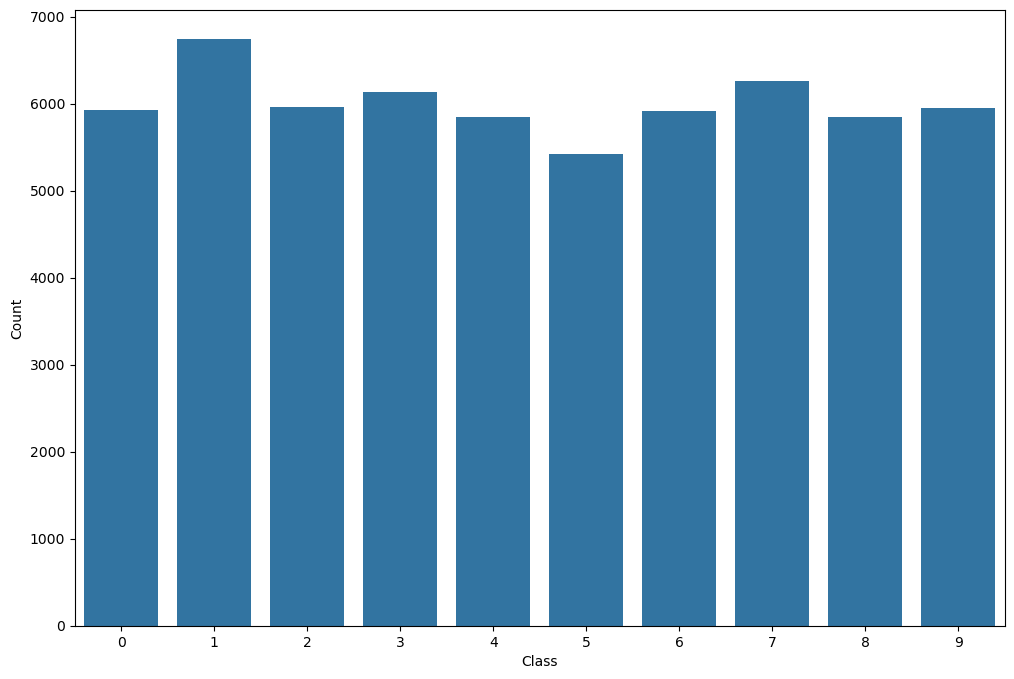

In [14]:
plt.figure(figsize = (12 ,8))
items = [{'Class': x, 'Count': y} for x, y in Counter(train_labels_dist).items()]
distribution = pd.DataFrame(items).sort_values(['Class'])
sns.barplot(x=distribution.Class, y=distribution.Count);

In [15]:
Counter(train_labels_dist).most_common()

[(1, 6742),
 (7, 6265),
 (3, 6131),
 (2, 5958),
 (9, 5949),
 (0, 5923),
 (6, 5918),
 (8, 5851),
 (4, 5842),
 (5, 5421)]

In [16]:
Counter(test_labels_dist).most_common()

[(1, 1135),
 (2, 1032),
 (7, 1028),
 (3, 1010),
 (9, 1009),
 (4, 982),
 (0, 980),
 (8, 974),
 (6, 958),
 (5, 892)]

## Plot sample images with their labels

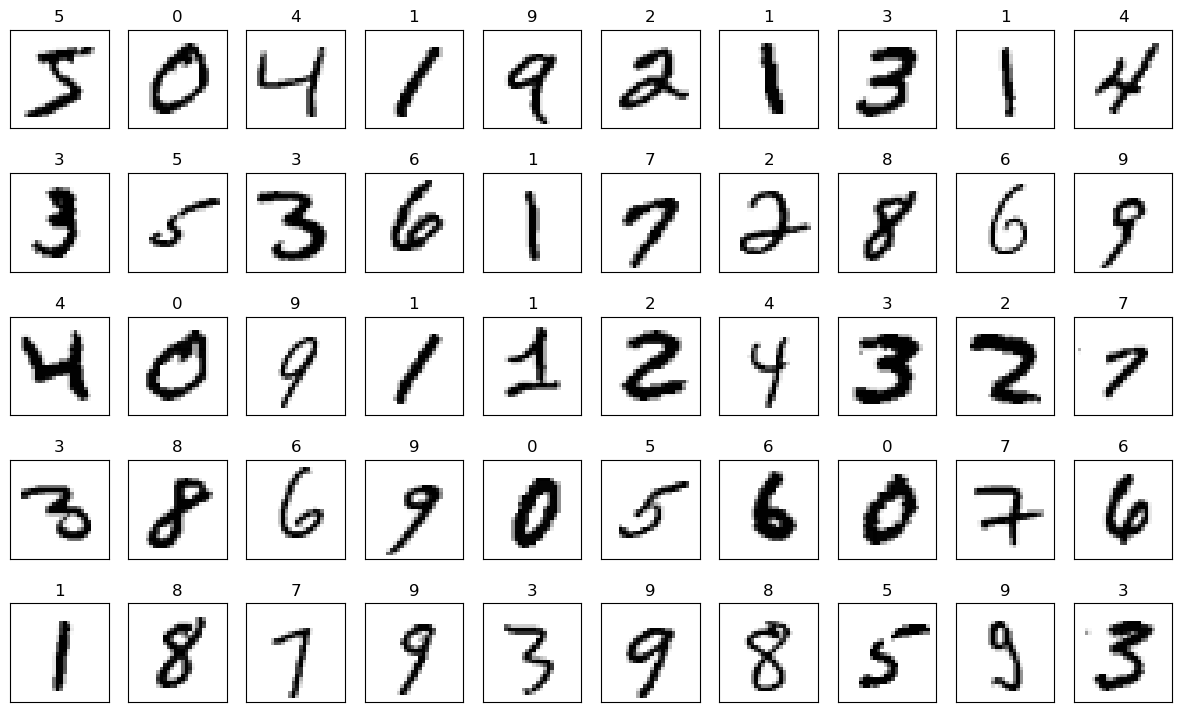

In [17]:
fig = plt.figure(figsize = (15, 9))

for i in range(50):
    plt.subplot(5, 10, 1+i)
    plt.title(train_labels_dist[i])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images_dist[i].reshape(28,28), cmap='binary')

In [18]:
np.set_printoptions(linewidth=np.inf)
print("{}".format(train_images_dist[2020]))


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 167 208  19   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  13 235 254  99   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  74 254 234   4   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 154 254 145   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 224 254  92   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  51 245 211  13   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2 169 254 101   0   0   0   0   0   

## Creating the DNN Model

* In this step, we first choose the network architecture for the model. Then we build.compile, train and evaulate the model.

## Build the DNN model

We use a `Sequential` class defined in `Keras` to create our model. All the layers are going to be Dense layers. This means, like the figure shown above, all the nodes of a layer would be connected to all the nodes of the preceding layer i.e. densely connected.

After the model is built, we view ....

## Experiment 1

- 784 Input Nodes
- hidden layer: 1 node
- output layer: 10 nodes


In [19]:
# k.clear_session()
model = Sequential([
    Dense(name = 'hidden_layer_1', units=1, activation='relu', input_shape=[784]),
    Dense(name = 'output_layer', units = 10, activation ='softmax')
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 1)                 785       
                                                                 
 output_layer (Dense)        (None, 10)                20        
                                                                 
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


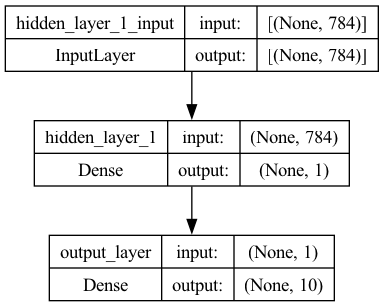

In [21]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True)

## Compile the DNN model

In addition to setting up our model architecture, we also need to define which algorithm should the model use in order to optimize the weights and biases as per the given data. We will use stochastic gradient descent.

We also need to define a loss function. Think of this function as the difference between the predicted outputs and the actual outputs given in the dataset. This loss needs to be minimized in order to have a higher model accuracy. That's what the optimization algorithm essentially does - it minimizes the loss during model training. For our multi-class classification problem, categorical cross entropy is commonly used.

Finally, we will use the accuracy during training as a metric to keep track of as the model trains.

In [22]:
model.compile(optimizer='rmsprop',
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy'])

## Train the DNN model

<b>tf.keras.model.fit</b><br>
  https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit

In [23]:
history = model.fit( train_images
    , train_labels
    , epochs=30
    , validation_data=(val_images, val_labels)
    , callbacks=[tf.keras.callbacks.ModelCheckpoint("exp_1_optimized.h5",save_best_only=True,save_weights_only=False)] 
    )

Epoch 1/30
 155/1719 [=>............................] - ETA: 0s - loss: 2.1836 - accuracy: 0.1623      

2024-10-06 14:04:34.523090: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1719/1719 [==============================] - 1s 337us/step - loss: 1.9725 - accuracy: 0.2158 - val_loss: 1.8652 - val_accuracy: 0.2596
Epoch 2/30
1719/1719 [==============================] - 1s 302us/step - loss: 1.7900 - accuracy: 0.2817 - val_loss: 1.7219 - val_accuracy: 0.2974
Epoch 3/30
1719/1719 [==============================] - 1s 301us/step - loss: 1.6930 - accuracy: 0.2992 - val_loss: 1.6711 - val_accuracy: 0.2974
Epoch 4/30
1719/1719 [==============================] - 1s 305us/step - loss: 1.6588 - accuracy: 0.3037 - val_loss: 1.6456 - val_accuracy: 0.3006
Epoch 5/30
1719/1719 [==============================] - 1s 302us/step - loss: 1.6414 - accuracy: 0.3058 - val_loss: 1.6329 - val_accuracy: 0.3008
Epoch 6/30
1719/1719 [==============================] - 1s 304us/step - loss: 1.6302 - accuracy: 0.3091 - val_loss: 1.6230 - val_accuracy: 0.3024
Epoch 7/30
1719/1719 [==============================] - 1s 301us/step - loss: 1.6219 - accuracy: 0.3111 - val_loss: 1.6216 - val_accura

In [24]:
model = tf.keras.models.load_model("exp_1_optimized.h5")

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 1)                 785       
                                                                 
 output_layer (Dense)        (None, 10)                20        
                                                                 
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


## Evaluate the DNN model

In order to ensure that this is not a simple "memorization" by the machine, we should evaluate the performance on the test set. This is easy to do, we simply use the `evaluate` method on our model.

In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'test acc: {test_acc}, test loss: {test_loss}')

313/313 [==============================] - 0s 289us/step - loss: 1.5491 - accuracy: 0.3818
test acc: 0.38179999589920044, test loss: 1.5491249561309814


## Plot performance metrics

We use `Matplotlib` to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [27]:
history_dict = history.history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

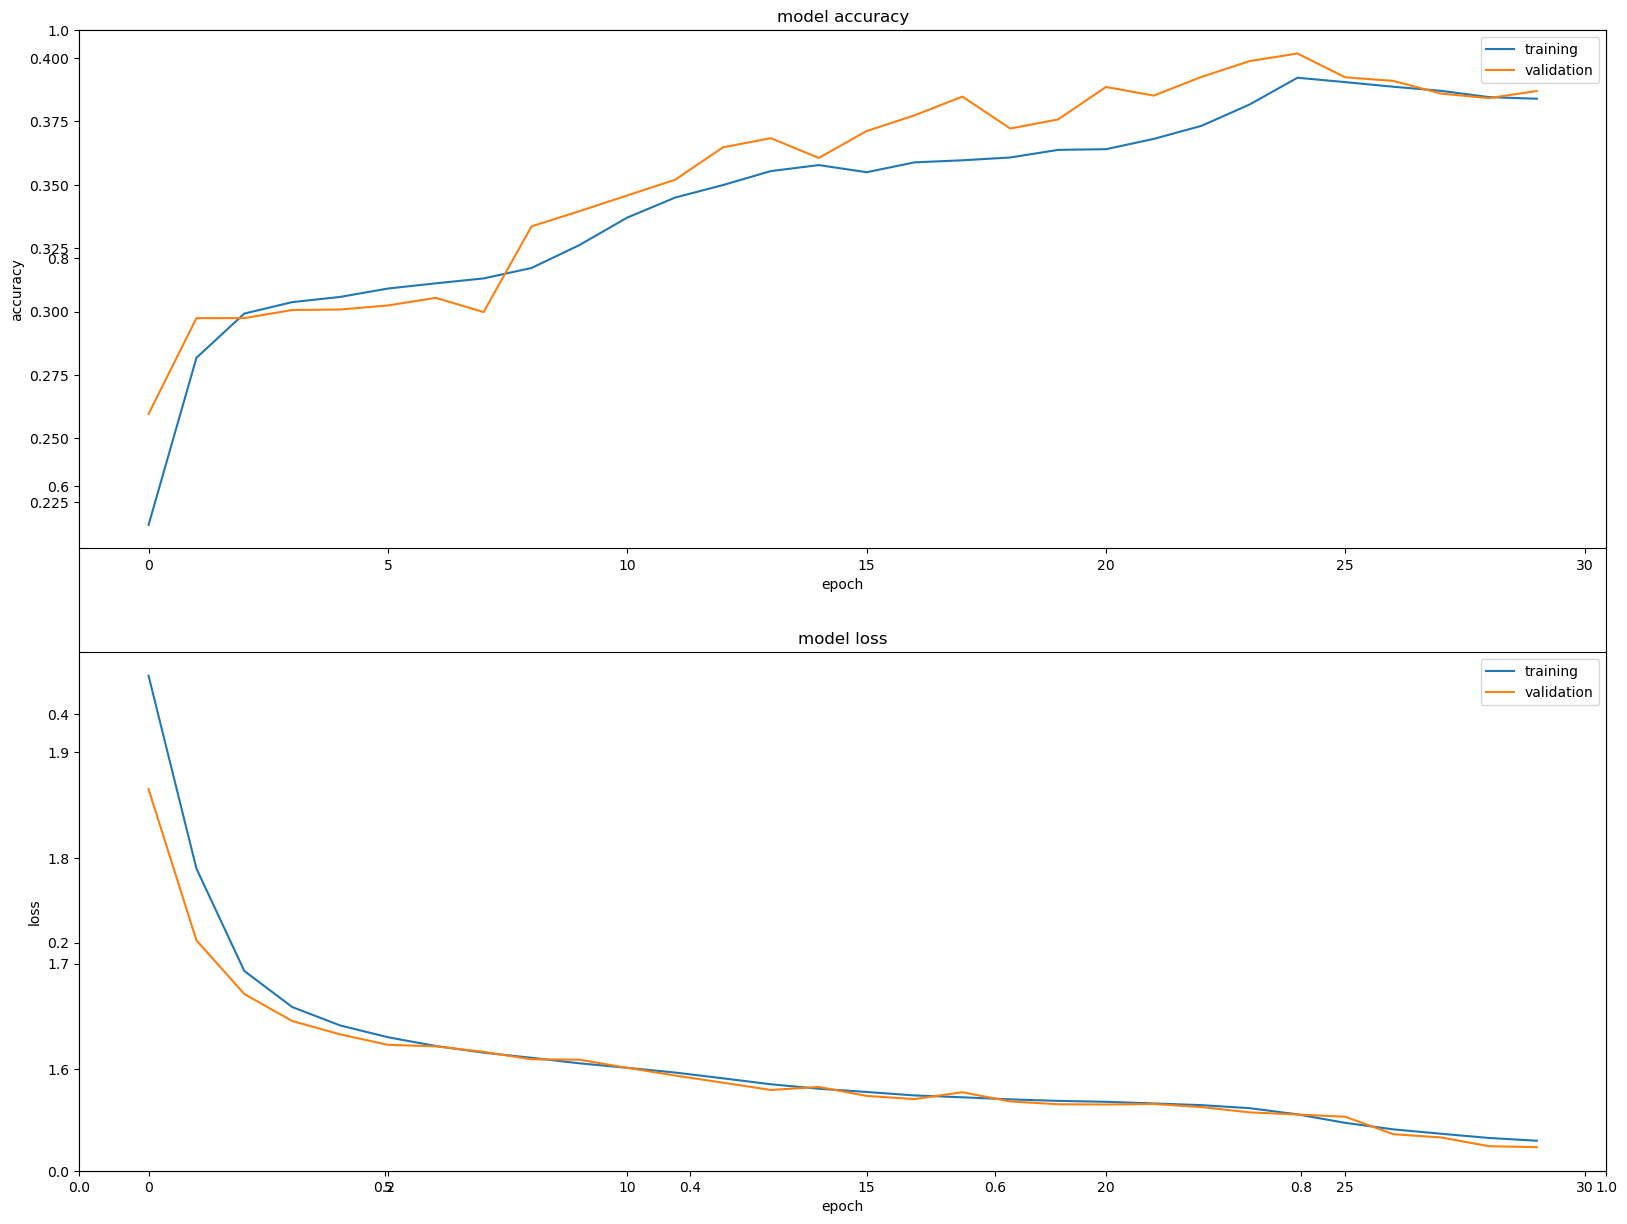

In [33]:
plt.subplots(figsize=(16,12))
plt.tight_layout()
display_training_curves(history_dict['accuracy'], history_dict['val_accuracy'], 'accuracy', 211)
display_training_curves(history_dict['loss'], history_dict['val_loss'], 'loss', 212)

## Making Predictions

In [30]:
# Get the predicted classes:
# model.predict_classes() is depricated in TensorFlow 2.7+
# pred_classes = model.predict(train_images)
# alternate method:
pred_train=model.predict(train_images) 
pred_classes=np.argmax(pred_train, axis=1)

1719/1719 [==============================] - 0s 197us/step


In [41]:
print_validation_report(train_labels, pred_classes)

Classification Report
              precision    recall  f1-score   support

           0       0.52      0.45      0.48      5444
           1       0.43      0.88      0.58      6179
           2       0.23      0.38      0.29      5470
           3       0.27      0.53      0.36      5638
           4       0.00      0.00      0.00      5307
           5       0.00      0.00      0.00      4987
           6       0.38      0.45      0.41      5417
           7       0.55      0.86      0.67      5715
           8       0.00      0.00      0.00      5389
           9       0.35      0.16      0.22      5454

    accuracy                           0.38     55000
   macro avg       0.27      0.37      0.30     55000
weighted avg       0.28      0.38      0.31     55000

Accuracy Score: 0.3846
Root Mean Square Error: 3.233677894792975


/opt/anaconda3/envs/422project/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/422project/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/422project/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

## Create the confusion matrix

Let us see what the confusion matrix looks like. Using both `sklearn.metrics`. Then we visualize the confusion matrix and see what that tells us.

In [47]:
conf_mx = tf.math.confusion_matrix(train_labels, pred_classes)
conf_mx;

In [48]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)
df = pd.DataFrame(pred_train[0:20], columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

## Visualize the confusion matrix

We use code from chapter 3 of Hands on Machine Learning (A. Geron) (cf. https://github.com/ageron/handson-ml2/blob/master/03_classification.ipynb) to display a "heat map" of the confusion matrix. Then we normalize the confusion matrix so we can compare error rates.

See https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/ch03.html#classification_chapter

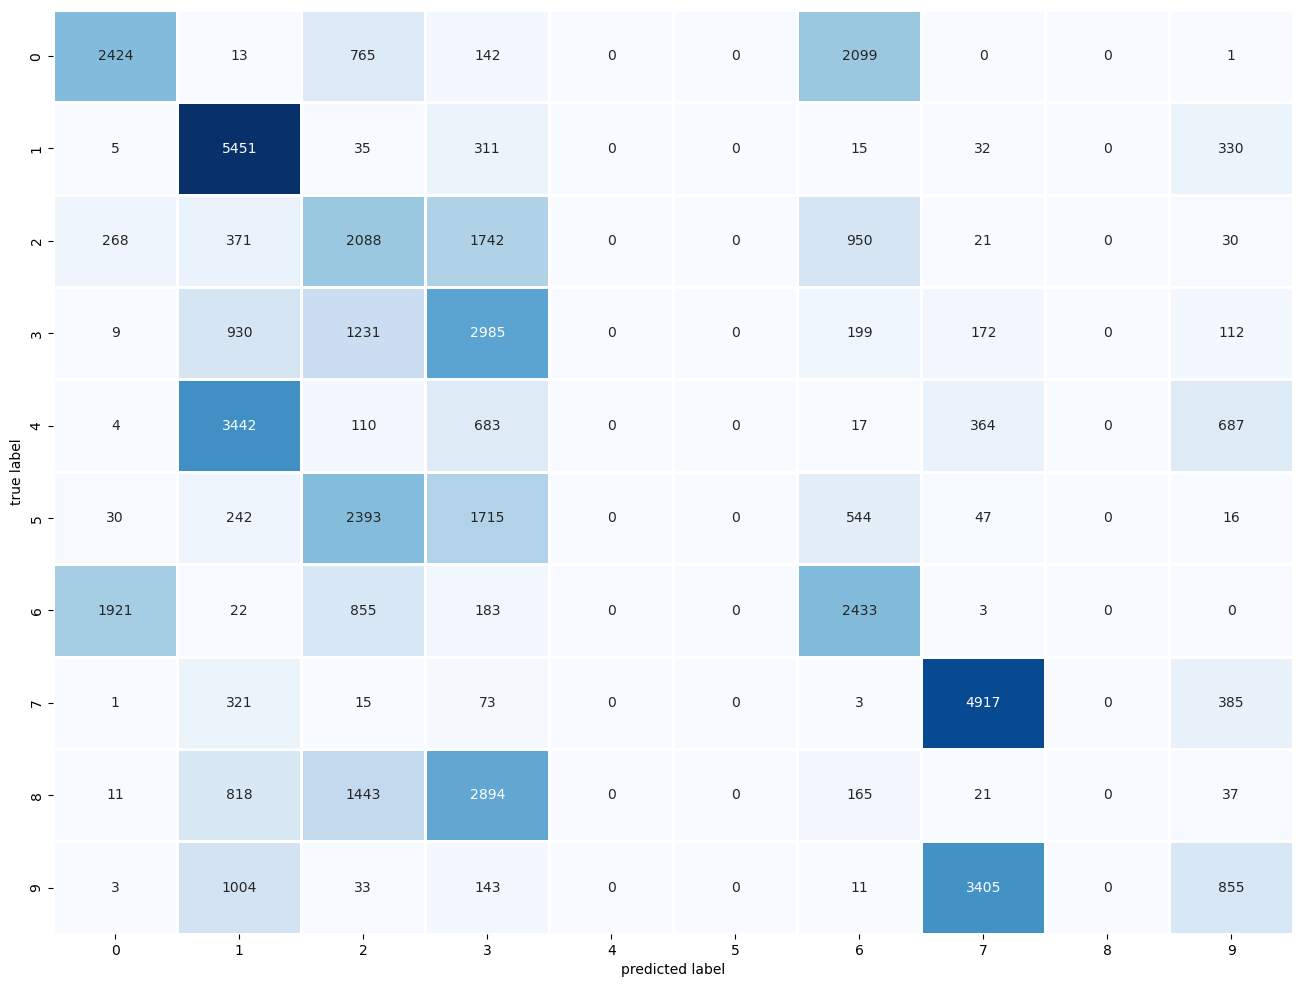

In [56]:
mtx = plot_confusion_matrix(train_labels,pred_classes)

 ## Get Activation Values of the Hidden Nodes (128)

To get the activation values of the hidden nodes, we need to create a new model, `activation_model`, that takes the same input as our current model but outputs the activation value of the hidden layer, i.e. of the hidden node. Then use the `predict` function to get the activation values.

In [51]:
# Extracts the outputs of the 2 layers:
layer_outputs = [layer.output for layer in model.layers]

# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

print(f"There are {len(layer_outputs)} layers")
layer_outputs # description of the layers

There are 2 layers


[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'hidden_layer_1')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'output_layer')>]

In [52]:
# Get the output of the hidden node for each of the 55000 training images
activations = activation_model.predict(train_images)
hidden_layer_activation = activations[0]
hidden_layer_activation.shape   #  hidden node has one activation value per training image

1719/1719 [==============================] - 0s 221us/step


(55000, 1)

In [53]:
print(f"The maximum activation value of the hidden node is {hidden_layer_activation.max()}")

The maximum activation value of the hidden node is 14.317005157470703


In [54]:
# Some stats about the output layer as an aside...
np.set_printoptions(suppress = True)  # display probabilities as decimals and NOT in scientific notation
ouput_layer_activation = activations[1]
print(f"The output node has shape {ouput_layer_activation.shape}")
print(f"The output for the first image are {ouput_layer_activation[0].round(4)}")
print(f"The sum of the probabilities is (approximately) {ouput_layer_activation[0].sum()}")

The output node has shape (55000, 10)
The output for the first image are [0.    0.088 0.001 0.004 0.045 0.001 0.    0.557 0.003 0.302]
The sum of the probabilities is (approximately) 1.0


In [55]:
boxplot_df = pd.DataFrame({'act_value':hidden_layer_activation.reshape(55000),
                           'pred_class':pred_classes})
boxplot_df.head()

act_value  pred_class
0   0.000000           7
1   2.302789           3
2   0.304156           7
3   5.188391           6
4   1.470149           1

 ## Visualize the activation values with boxplots

We get the activation values of the first hidden node and combine them with the corresponding class labels into a DataFrame. We use both `matplotlib` and `seaborn` to create boxplots from the dataframe.

<Axes: title={'center': 'act_value'}, xlabel='pred_class'>

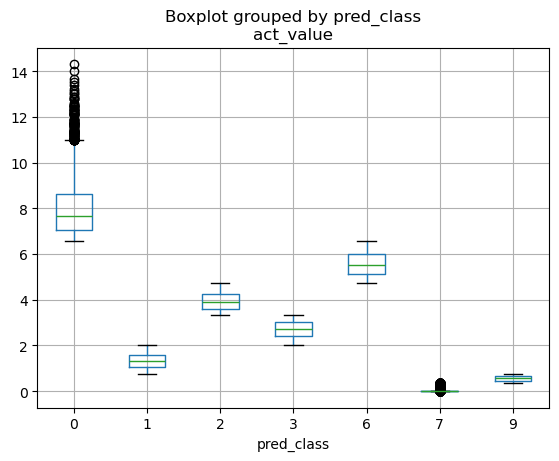

In [56]:
# To see how closely the hidden nodes activation values correlate with the class predictions
# Note that there were no 5s detected and that there were outliers for the activation values for the 6s
boxplot_df[['act_value','pred_class']].boxplot(by ='pred_class', column =['act_value'], grid = True) 

In [57]:
boxplot_df['pred_class'].value_counts() # Another way to verify what the boxplot is telling us

pred_class
1    12614
3    10871
7     8982
2     8968
6     6436
0     4676
9     2453
Name: count, dtype: int64

/var/folders/xb/lr7m025s58x8rlx_nc_7vx5r0000gn/T/ipykernel_19302/2994299546.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bplot = sns.boxplot(y='act_value', x='pred_class',


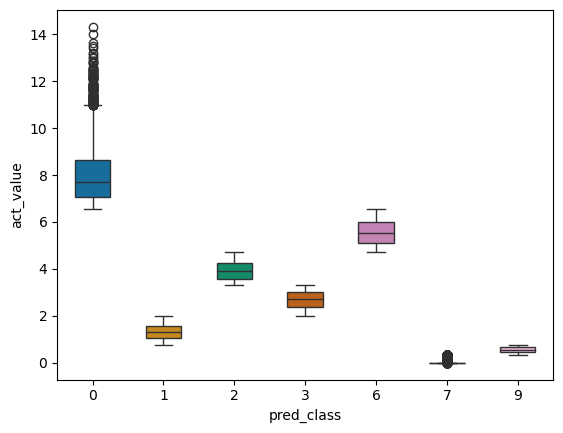

In [58]:
# Let us use seaborn for the boxplots this time.
bplot = sns.boxplot(y='act_value', x='pred_class', 
                 data=boxplot_df, 
                 width=0.5,
                 palette="colorblind")

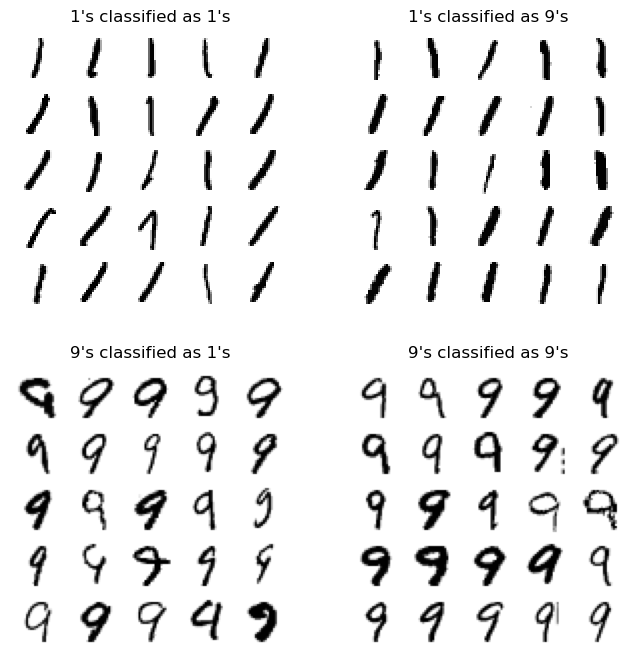

In [61]:
cl_a, cl_b = 1, 9
X_aa = train_images[(train_labels == cl_a) & (pred_classes == cl_a)]
X_ab = train_images[(train_labels == cl_a) & (pred_classes == cl_b)]
X_ba = train_images[(train_labels == cl_b) & (pred_classes == cl_a)]
X_bb = train_images[(train_labels == cl_b) & (pred_classes == cl_b)]
plt.figure(figsize=(8,8))

p1 = plt.subplot(221)
p2 = plt.subplot(222)
p3 = plt.subplot(223)
p4 = plt.subplot(224)

plot_digits(X_aa[:25], p1, images_per_row=5);
plot_digits(X_ab[:25], p2, images_per_row=5);
plot_digits(X_ba[:25], p3, images_per_row=5);
plot_digits(X_bb[:25], p4, images_per_row=5);


p1.set_title(f"{cl_a}'s classified as {cl_a}'s")
p2.set_title(f"{cl_a}'s classified as {cl_b}'s")
p3.set_title(f"{cl_b}'s classified as {cl_a}'s")
p4.set_title(f"{cl_b}'s classified as {cl_b}'s")

# plt.savefig("error_analysis_digits_plot_EXP1_valid")

plt.show()



## Experiment 2

- 784 Input Nodes
- hidden layer: 2 nodes
- output layer: 10 nodes


In [63]:
# k.clear_session()
model = Sequential([
    Dense(name = 'hidden_layer_1', units=2, activation='relu', input_shape=[784]),
    Dense(name = 'output_layer', units = 10, activation ='softmax')
])

## Build the DNN model

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 2)                 1570      
                                                                 
 output_layer (Dense)        (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


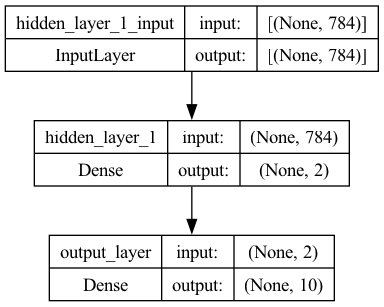

In [65]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True)

## Compile the DNN model

In [66]:
model.compile(optimizer='rmsprop',
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy'])


## Train the DNN model

In [67]:
history = model.fit( train_images
    , train_labels
    , epochs=30
    , validation_data=(val_images, val_labels)
    , callbacks=[tf.keras.callbacks.ModelCheckpoint("exp_2_optimized.h5",save_best_only=True,save_weights_only=False)] 
    )

Epoch 1/30
1719/1719 [==============================] - 1s 383us/step - loss: 1.6624 - accuracy: 0.4288 - val_loss: 1.4240 - val_accuracy: 0.5120
Epoch 2/30
1719/1719 [==============================] - 1s 313us/step - loss: 1.3540 - accuracy: 0.5343 - val_loss: 1.2949 - val_accuracy: 0.5608
Epoch 3/30
1719/1719 [==============================] - 1s 314us/step - loss: 1.2780 - accuracy: 0.5690 - val_loss: 1.2404 - val_accuracy: 0.5916
Epoch 4/30
1719/1719 [==============================] - 1s 315us/step - loss: 1.2256 - accuracy: 0.6023 - val_loss: 1.1941 - val_accuracy: 0.6274
Epoch 5/30
1719/1719 [==============================] - 1s 311us/step - loss: 1.1894 - accuracy: 0.6173 - val_loss: 1.1670 - val_accuracy: 0.6338
Epoch 6/30
1719/1719 [==============================] - 1s 317us/step - loss: 1.1712 - accuracy: 0.6231 - val_loss: 1.1501 - val_accuracy: 0.6368
Epoch 7/30
1719/1719 [==============================] - 1s 310us/step - loss: 1.1608 - accuracy: 0.6248 - val_loss: 1.1494 -

## Evaluate the DNN model

In [68]:
model = tf.keras.models.load_model("exp_2_optimized.h5")
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 284us/step - loss: 1.0713 - accuracy: 0.6571


In [69]:
print(f'test acc: {test_acc}, test loss: {test_loss}')

test acc: 0.6571000218391418, test loss: 1.0712623596191406


## Plot performance metrics

In [70]:
history_dict = history.history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

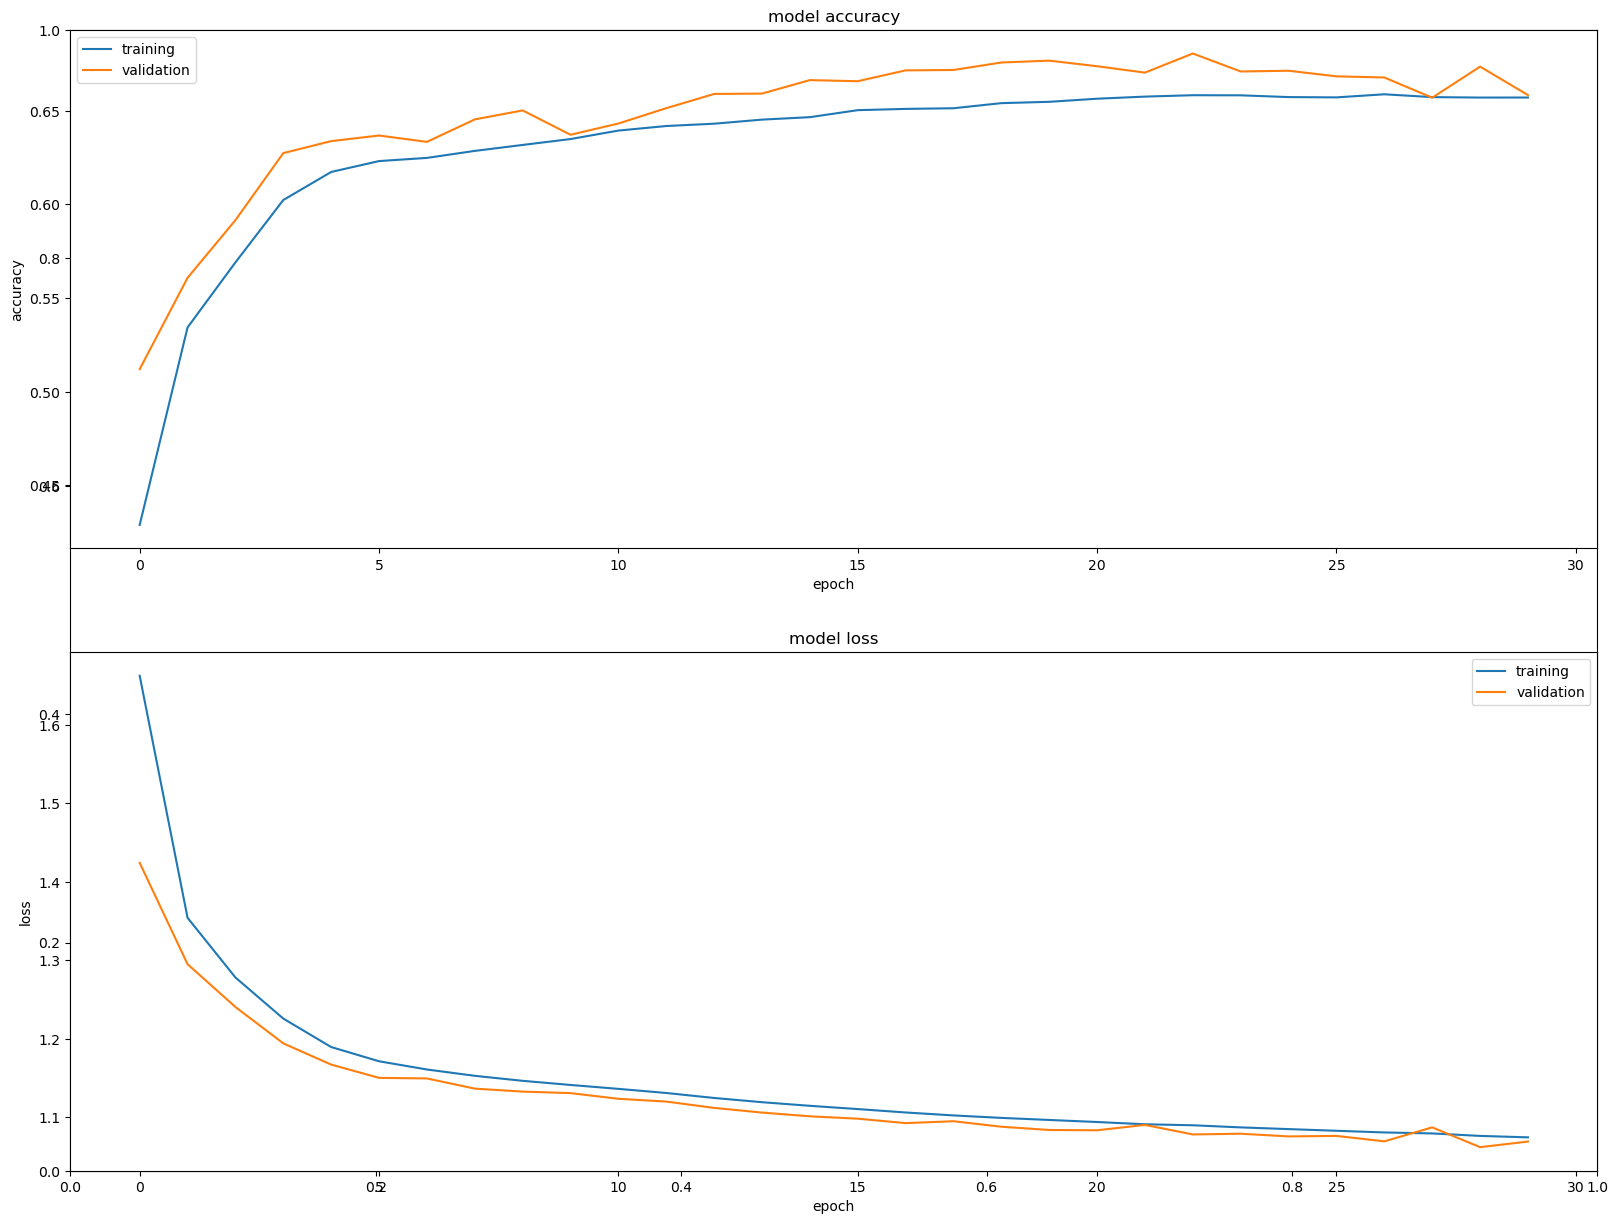

In [73]:
plt.subplots(figsize=(16,12))
plt.tight_layout()
display_training_curves(history_dict['accuracy'], history_dict['val_accuracy'], 'accuracy', 211)
display_training_curves(history_dict['loss'], history_dict['val_loss'], 'loss', 212)

## Making Predictions

In [74]:
# Get the predicted classes:
# model.predict_classes() is depricated in TensorFlow 2.7+
# pred_classes = model.predict(train_images)
# alternate method:
pred_train=model.predict(train_images) 
pred_classes=np.argmax(pred_train, axis=1)

1719/1719 [==============================] - 0s 200us/step


In [76]:
print_validation_report(train_labels, pred_classes)

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      5444
           1       0.85      0.92      0.88      6179
           2       0.60      0.45      0.52      5470
           3       0.68      0.70      0.69      5638
           4       0.51      0.47      0.49      5307
           5       0.70      0.64      0.67      4987
           6       0.80      0.75      0.77      5417
           7       0.69      0.82      0.75      5715
           8       0.46      0.55      0.50      5389
           9       0.47      0.44      0.46      5454

    accuracy                           0.66     55000
   macro avg       0.66      0.65      0.65     55000
weighted avg       0.66      0.66      0.66     55000

Accuracy Score: 0.6596545454545455
Root Mean Square Error: 2.541706656416654


## Create the confusion matrix

In [77]:
conf_mx = tf.math.confusion_matrix(train_labels, pred_classes)
conf_mx;

In [78]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)
df = pd.DataFrame(pred_train[0:20], columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

## Visualize the confusion matrix

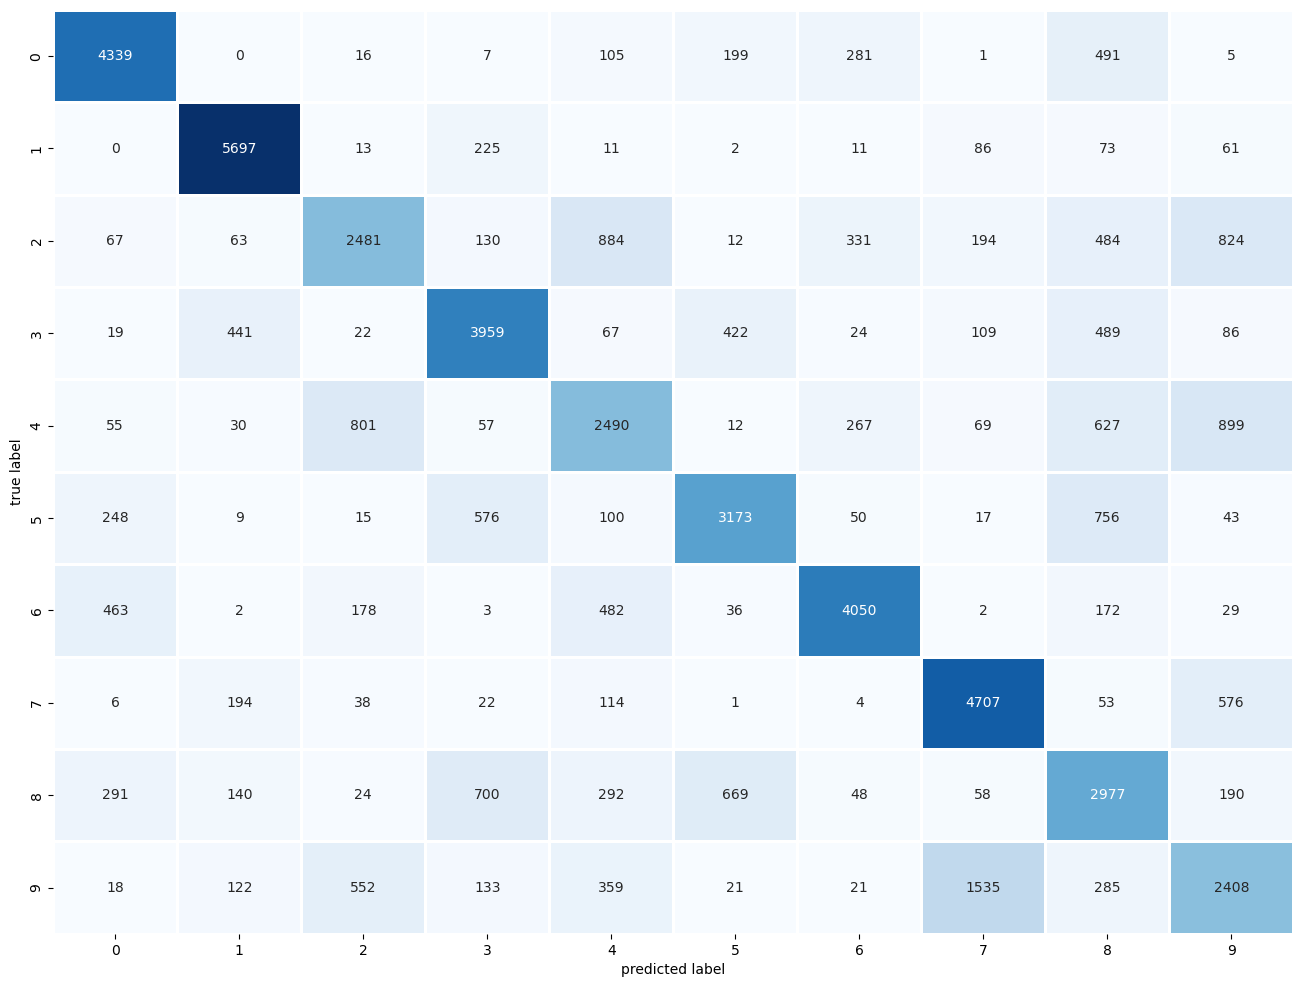

In [79]:
mtx = plot_confusion_matrix(train_labels,pred_classes)

## Get Activation Values of the Hidden Nodes (128)

In [80]:
# Extracts the outputs of the 2 layers:
layer_outputs = [layer.output for layer in model.layers]

# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

print(f"There are {len(layer_outputs)} layers")
layer_outputs # description of the layers

There are 2 layers


[<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'hidden_layer_1')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'output_layer')>]

In [81]:
# Get the output of the hidden node for each of the 55000 training images
activations = activation_model.predict(train_images)
hidden_layer_activation = activations[0]
hidden_layer_activation.shape   #  hidden node has one activation value per training image

1719/1719 [==============================] - 0s 223us/step


(55000, 2)

In [82]:
hidden_node1_activation = hidden_layer_activation[:,0] # get activation values of the first hidden node
hidden_node2_activation = hidden_layer_activation[:,1] # get activation values of the second hidden node

print(f"The maximum activation value of the first hidden node is {hidden_node1_activation.max()}")
print(f"The maximum activation value of the second hidden node is {hidden_node2_activation.max()}")

The maximum activation value of the first hidden node is 22.321428298950195
The maximum activation value of the second hidden node is 75.70663452148438


In [83]:
# Some stats about the output layer as an aside...
np.set_printoptions(suppress = True)  # display probabilities as decimals and NOT in scientific notation
ouput_layer_activation = activations[1]
print(f"The output node has shape {ouput_layer_activation.shape}")
print(f"The output for the first image are {ouput_layer_activation[0].round(4)}")
print(f"The sum of the probabilities is (approximately) {ouput_layer_activation[0].sum()}")

The output node has shape (55000, 10)
The output for the first image are [0.    0.    0.097 0.    0.032 0.    0.001 0.592 0.001 0.278]
The sum of the probabilities is (approximately) 1.0


In [84]:
scatterPlot_df =  pd.DataFrame({'act_value_h1':hidden_node1_activation,
                                'act_value_h2':hidden_node2_activation,
                                'pred_class':pred_classes})
scatterPlot_df.head()

act_value_h1  act_value_h2  pred_class
0      0.000000      5.461303           7
1      4.111321      0.957018           3
2      2.540297      4.186171           9
3      6.147233     12.957750           6
4      0.769478      0.000000           1

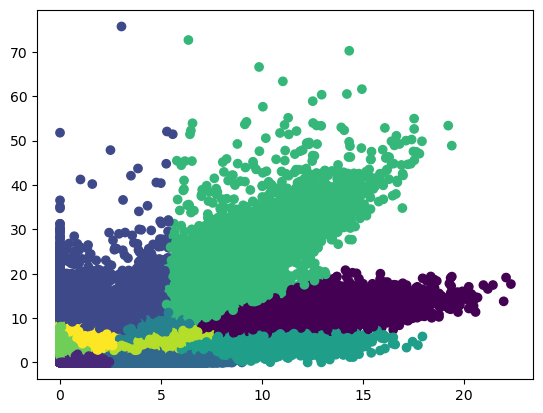

In [85]:
#plt.legend(loc='upper left', prop={'size':6}, bbox_to_anchor=(1,1),ncol=1)
plt.scatter(scatterPlot_df.act_value_h1, 
            scatterPlot_df.act_value_h2, 
            c=scatterPlot_df.pred_class,
            label=scatterPlot_df.pred_class)
plt.show()

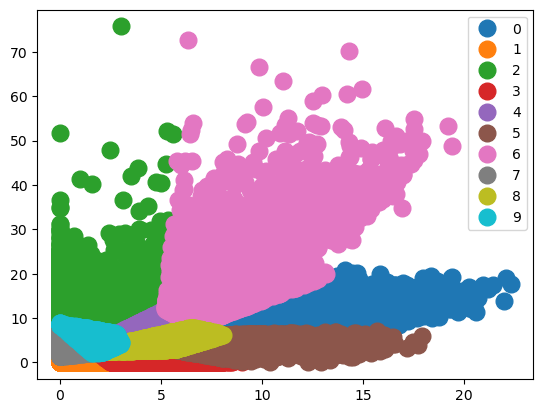

In [86]:
groups = scatterPlot_df.groupby('pred_class')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.act_value_h1, group.act_value_h2, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

## Experiment 3

- 784 Input Nodes
- hidden layer: 128 nodes
- output layer: 10 nodes


In [87]:
# k.clear_session()
model = Sequential([
    Dense(name = 'hidden_layer_1', units=128, activation='relu', input_shape=[784]),
    Dense(name = 'output_layer', units = 10, activation ='softmax')
])

## Build the DNN model

In [88]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


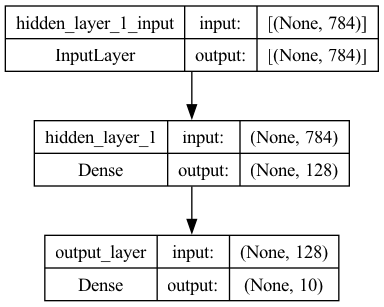

In [89]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True)

## Compile the DNN model

In [90]:
model.compile(optimizer='rmsprop',
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy'])

## Train the DNN model

In [91]:
history = model.fit(train_images
    , train_labels
    , epochs=20
    , validation_data=(val_images, val_labels)
    , callbacks=[tf.keras.callbacks.ModelCheckpoint("exp_3_optimized.h5",save_best_only=True,save_weights_only=False)] 
    )

Epoch 1/20
1719/1719 [==============================] - 1s 696us/step - loss: 0.2735 - accuracy: 0.9216 - val_loss: 0.1381 - val_accuracy: 0.9632
Epoch 2/20
1719/1719 [==============================] - 1s 653us/step - loss: 0.1292 - accuracy: 0.9617 - val_loss: 0.1016 - val_accuracy: 0.9712
Epoch 3/20
1719/1719 [==============================] - 1s 667us/step - loss: 0.0939 - accuracy: 0.9725 - val_loss: 0.1014 - val_accuracy: 0.9706
Epoch 4/20
1719/1719 [==============================] - 1s 682us/step - loss: 0.0738 - accuracy: 0.9786 - val_loss: 0.0811 - val_accuracy: 0.9776
Epoch 5/20
1719/1719 [==============================] - 1s 658us/step - loss: 0.0637 - accuracy: 0.9821 - val_loss: 0.0842 - val_accuracy: 0.9772
Epoch 6/20
1719/1719 [==============================] - 1s 660us/step - loss: 0.0537 - accuracy: 0.9850 - val_loss: 0.0870 - val_accuracy: 0.9758
Epoch 7/20
1719/1719 [==============================] - 1s 631us/step - loss: 0.0469 - accuracy: 0.9870 - val_loss: 0.0868 -

In [64]:
model = tf.keras.models.load_model("exp_3_optimized.h5")

## Evaluate the DNN model

In [92]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 363us/step - loss: 0.1293 - accuracy: 0.9769


In [93]:
print(f'test acc: {test_acc}, test loss: {test_loss}')

test acc: 0.9768999814987183, test loss: 0.12925855815410614


## Plot performance metrics

In [94]:
history_dict = history.history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

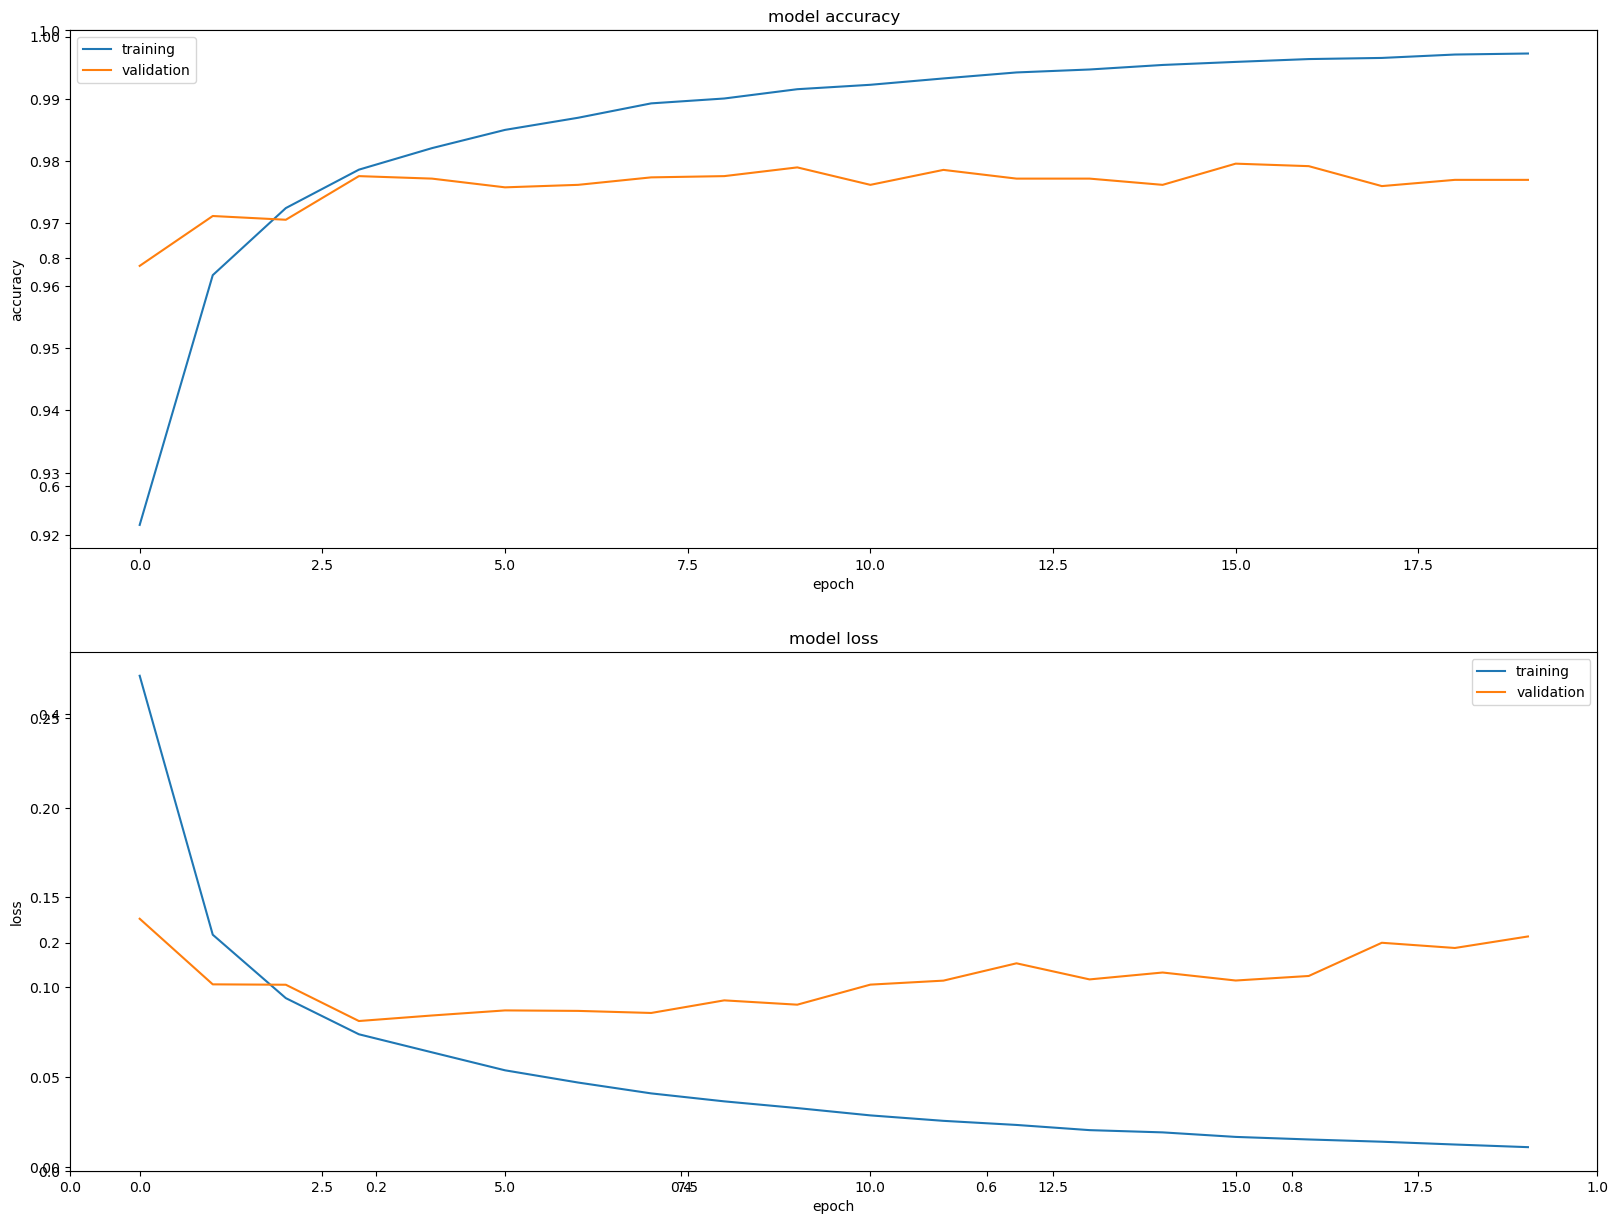

In [95]:
plt.subplots(figsize=(16,12))
plt.tight_layout()
display_training_curves(history_dict['accuracy'], history_dict['val_accuracy'], 'accuracy', 211)
display_training_curves(history_dict['loss'], history_dict['val_loss'], 'loss', 212)

## Making Predictions

In [96]:
# Get the predicted classes:
# model.predict_classes() is depricated in TensorFlow 2.7+
# pred_classes = model.predict(train_images)
# alternate method:
pred_train=model.predict(train_images) 
pred_classes=np.argmax(pred_train, axis=1)

1719/1719 [==============================] - 1s 282us/step


In [97]:
print_validation_report(train_labels, pred_classes)

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5444
           1       1.00      1.00      1.00      6179
           2       1.00      1.00      1.00      5470
           3       0.99      1.00      1.00      5638
           4       1.00      1.00      1.00      5307
           5       1.00      1.00      1.00      4987
           6       1.00      1.00      1.00      5417
           7       1.00      1.00      1.00      5715
           8       1.00      0.99      1.00      5389
           9       1.00      1.00      1.00      5454

    accuracy                           1.00     55000
   macro avg       1.00      1.00      1.00     55000
weighted avg       1.00      1.00      1.00     55000

Accuracy Score: 0.9980363636363636
Root Mean Square Error: 0.18887225119833584


## Create the confusion matrix

In [98]:
conf_mx = tf.math.confusion_matrix(train_labels, pred_classes)
conf_mx;

In [99]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)
df = pd.DataFrame(pred_train[0:20], columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

Most problematic classifications (actual, predicted):
- 7, 9
- 4, 9
- 5, 6

ZeroDivisionError: integer division or modulo by zero

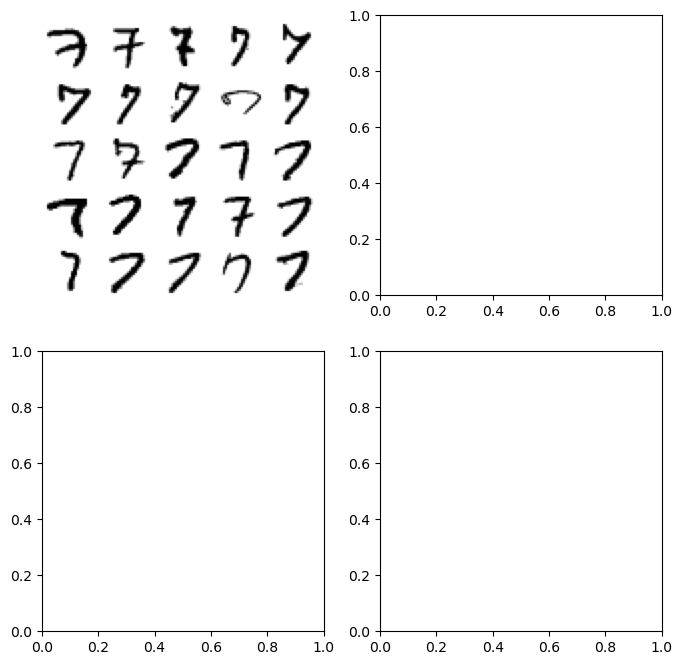

In [100]:
cl_a, cl_b = 7, 9
X_aa = train_images[(train_labels == cl_a) & (pred_classes == cl_a)]
X_ab = train_images[(train_labels == cl_a) & (pred_classes == cl_b)]
X_ba = train_images[(train_labels == cl_b) & (pred_classes == cl_a)]
X_bb = train_images[(train_labels == cl_b) & (pred_classes == cl_b)]

plt.figure(figsize=(8,8))

p1 = plt.subplot(221)
p2 = plt.subplot(222)
p3 = plt.subplot(223)
p4 = plt.subplot(224)

plot_digits(X_aa[:25], p1, images_per_row=5);
plot_digits(X_ab[:25], p2, images_per_row=5);
plot_digits(X_ba[:25], p3, images_per_row=5);
plot_digits(X_bb[:25], p4, images_per_row=5);


p1.set_title(f"{cl_a}'s classified as {cl_a}'s")
p2.set_title(f"{cl_a}'s classified as {cl_b}'s")
p3.set_title(f"{cl_b}'s classified as {cl_a}'s")
p4.set_title(f"{cl_b}'s classified as {cl_b}'s")

# plt.savefig("error_analysis_digits_plot_EXP1_valid")

plt.show()

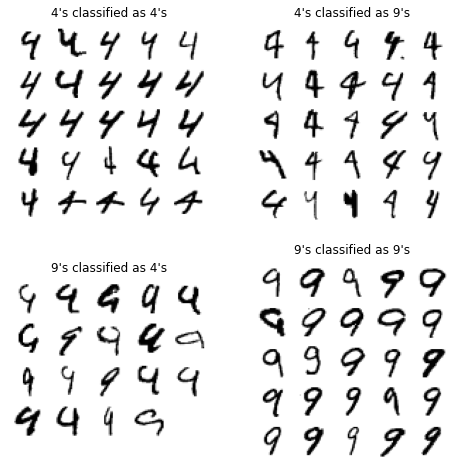

In [77]:
cl_a, cl_b = 4, 9
X_aa = train_images[(train_labels == cl_a) & (pred_classes == cl_a)]
X_ab = train_images[(train_labels == cl_a) & (pred_classes == cl_b)]
X_ba = train_images[(train_labels == cl_b) & (pred_classes == cl_a)]
X_bb = train_images[(train_labels == cl_b) & (pred_classes == cl_b)]

plt.figure(figsize=(8,8))

p1 = plt.subplot(221)
p2 = plt.subplot(222)
p3 = plt.subplot(223)
p4 = plt.subplot(224)

plot_digits(X_aa[:25], p1, images_per_row=5);
plot_digits(X_ab[:25], p2, images_per_row=5);
plot_digits(X_ba[:25], p3, images_per_row=5);
plot_digits(X_bb[:25], p4, images_per_row=5);


p1.set_title(f"{cl_a}'s classified as {cl_a}'s")
p2.set_title(f"{cl_a}'s classified as {cl_b}'s")
p3.set_title(f"{cl_b}'s classified as {cl_a}'s")
p4.set_title(f"{cl_b}'s classified as {cl_b}'s")

# plt.savefig("error_analysis_digits_plot_EXP1_valid")

plt.show()

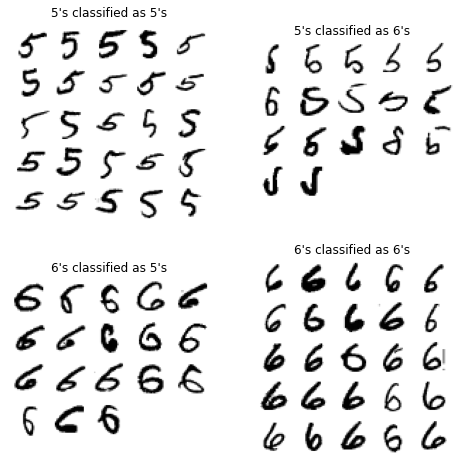

In [78]:
cl_a, cl_b = 5, 6
X_aa = train_images[(train_labels == cl_a) & (pred_classes == cl_a)]
X_ab = train_images[(train_labels == cl_a) & (pred_classes == cl_b)]
X_ba = train_images[(train_labels == cl_b) & (pred_classes == cl_a)]
X_bb = train_images[(train_labels == cl_b) & (pred_classes == cl_b)]

plt.figure(figsize=(8,8))

p1 = plt.subplot(221)
p2 = plt.subplot(222)
p3 = plt.subplot(223)
p4 = plt.subplot(224)

plot_digits(X_aa[:25], p1, images_per_row=5);
plot_digits(X_ab[:25], p2, images_per_row=5);
plot_digits(X_ba[:25], p3, images_per_row=5);
plot_digits(X_bb[:25], p4, images_per_row=5);


p1.set_title(f"{cl_a}'s classified as {cl_a}'s")
p2.set_title(f"{cl_a}'s classified as {cl_b}'s")
p3.set_title(f"{cl_b}'s classified as {cl_a}'s")
p4.set_title(f"{cl_b}'s classified as {cl_b}'s")

# plt.savefig("error_analysis_digits_plot_EXP1_valid")

plt.show()

 ## Get Activation Values of the Hidden Nodes (128)

In [101]:
# Extracts the outputs of the 2 layers:
layer_outputs = [layer.output for layer in model.layers]

# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

print(f"There are {len(layer_outputs)} layers")
layer_outputs; # description of the layers

There are 2 layers


In [102]:
# Get the outputs of all the hidden nodes for each of the 60000 training images
activations = activation_model.predict(train_images)
hidden_layer_activation = activations[0]
output_layer_activations = activations[1]
hidden_layer_activation.shape   #  each of the 128 hidden nodes has one activation value per training image

1719/1719 [==============================] - 1s 303us/step


(55000, 128)

In [103]:
output_layer_activations.shape

(55000, 10)

In [104]:
print(f"The maximum activation value of the hidden nodes in the hidden layer is \
{hidden_layer_activation.max()}")

The maximum activation value of the hidden nodes in the hidden layer is 27.001949310302734


In [105]:
# Some stats about the output layer as an aside...
np.set_printoptions(suppress = True)  # display probabilities as decimals and NOT in scientific notation
ouput_layer_activation = activations[1]
print(f"The output node has shape {ouput_layer_activation.shape}")
print(f"The output for the first image are {ouput_layer_activation[0].round(4)}")
print(f"The sum of the probabilities is (approximately) {ouput_layer_activation[0].sum()}")

The output node has shape (55000, 10)
The output for the first image are [0.    0.    0.    0.002 0.    0.    0.    0.998 0.    0.   ]
The sum of the probabilities is (approximately) 1.0000001192092896


 ## Create a dataframe with the activation values and the class labels

In [106]:
#Get the dataframe of all the node values
activation_data = {'actual_class':train_labels}
for k in range(0,128): 
    activation_data[f"act_val_{k}"] = hidden_layer_activation[:,k]

activation_df = pd.DataFrame(activation_data)
activation_df.head(15).round(3).T

0      1      2      3      4      5      6      7      8   \
actual_class  7.000  3.000  4.000  6.000  1.000  8.000  1.000  0.000  9.000   
act_val_0     0.000  6.219  0.259  0.000  0.000  5.039  0.000  0.000  0.000   
act_val_1     0.081  4.961  3.005  0.000  0.372  2.713  0.711  0.000  1.910   
act_val_2     0.000  0.000  2.364  3.863  2.049  0.478  1.968  2.815  0.000   
act_val_3     0.000  2.214  0.000  0.000  0.014  0.000  0.000  0.000  0.000   
...             ...    ...    ...    ...    ...    ...    ...    ...    ...   
act_val_123   0.000  1.131  0.000  0.000  4.122  0.000  5.237  0.000  0.888   
act_val_124   0.000  0.000  0.000  0.000  3.202  0.000  3.514  0.000  0.000   
act_val_125   2.555  0.000  0.000  1.396  0.000  0.000  0.000  0.792  0.000   
act_val_126   0.000  1.096  0.000  0.000  3.197  0.000  2.391  4.375  0.000   
act_val_127   0.000  0.178  0.448  0.000  0.000  2.273  0.000  0.000  0.000   

                 9      10     11     12     13     14  
actual_class  8.000  0.000  3.000  1.000  2.000  7.000  
act_val_0     3.828  5.103  2.266  0.000  2.822  0.000  
act_val_1     4.143  0.000  4.361  0.039  0.000  0.000  
act_val_2     2.975  0.000  4.256  2.691  0.100  0.000  
act_val_3     0.000  0.000  3.492  0.000  2.885  0.000  
...             ...    ...    ...    ...    ...    ...  
act_val_123   2.010  0.000  5.197  5.925  0.000  5.354  
act_val_124   0.000  0.000  0.000  4.293  0.000  1.053  
act_val_125   0.000  4.414  0.000  0.000  0.281  2.303  
act_val_126   4.363  8.332  4.093  0.000  3.094  0.000  
act_val_127   4.840  2.500  5.048  0.000  0.000  0.000  

[129 rows x 15 columns]

 ## Visualize the activation values with boxplots

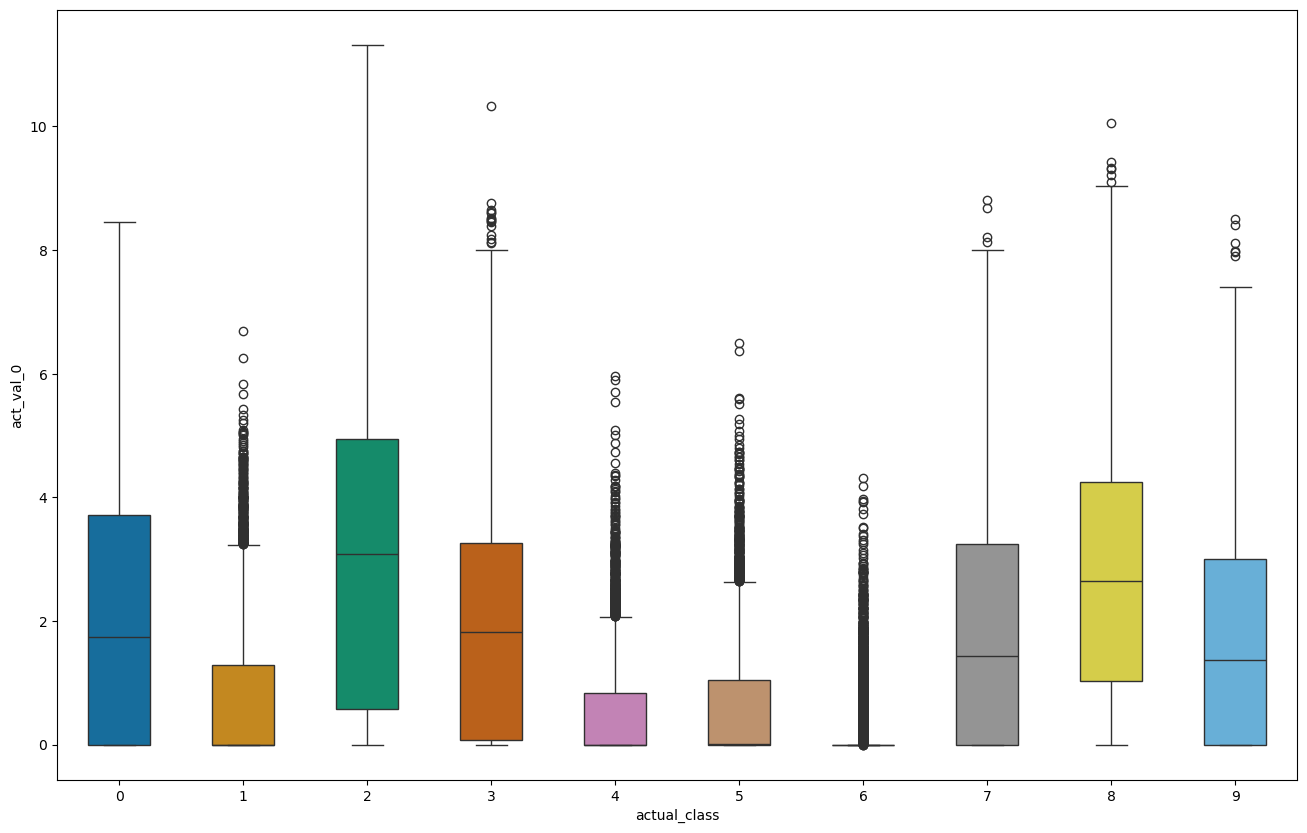

In [107]:
# To see how closely the hidden node activation values correlate with the class labels
# Let us use seaborn for the boxplots this time.
plt.figure(figsize=(16,10))
bplot = sns.boxplot(y='act_val_0', x='actual_class', 
                 data=activation_df[['act_val_0','actual_class']], 
                 width=0.5,
                 palette="colorblind")

## Displaying The Range Of Activation Values For Each Class Labels

In [108]:
activation_df.groupby("actual_class")["act_val_0"].apply(lambda x: [round(min(x.tolist()),2),
 round(max(x.tolist()),2)]).reset_index().rename(columns={"act_val_0": "range_of_act_values"})

actual_class range_of_act_values
0             0         [0.0, 8.45]
1             1         [0.0, 6.69]
2             2        [0.0, 11.32]
3             3        [0.0, 10.32]
4             4         [0.0, 5.97]
5             5         [0.0, 6.49]
6             6          [0.0, 4.3]
7             7         [0.0, 8.81]
8             8        [0.0, 10.05]
9             9          [0.0, 8.5]

## Get Activation Values of the Pixel Values (784)

 ## Create a dataframe with the pixel values and class labels

In [109]:
#Get the dataframe of all the pixel values
pixel_data = {'actual_class':train_labels}
for k in range(0,784): 
    pixel_data[f"pix_val_{k}"] = train_images[:,k]
pixel_df = pd.DataFrame(pixel_data)
pixel_df.head(15).round(3).T

0    1    2    3    4    5    6    7    8    9    10   11   12  \
actual_class  7.0  3.0  4.0  6.0  1.0  8.0  1.0  0.0  9.0  8.0  0.0  3.0  1.0   
pix_val_0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
pix_val_1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
pix_val_2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
pix_val_3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
pix_val_779   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
pix_val_780   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
pix_val_781   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
pix_val_782   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
pix_val_783   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

               13   14  
actual_class  2.0  7.0  
pix_val_0     0.0  0.0  
pix_val_1     0.0  0.0  
pix_val_2     0.0  0.0  
pix_val_3     0.0  0.0  
...           ...  ...  
pix_val_779   0.0  0.0  
pix_val_780   0.0  0.0  
pix_val_781   0.0  0.0  
pix_val_782   0.0  0.0  
pix_val_783   0.0  0.0  

[785 rows x 15 columns]

In [110]:
pixel_df.pix_val_77.value_counts()

pix_val_77
0.000000    54741
1.000000       24
0.996078       10
0.992157        9
0.050980        5
            ...  
0.670588        1
0.858824        1
0.239216        1
0.839216        1
0.819608        1
Name: count, Length: 143, dtype: int64

In [111]:
pixel_df.pix_val_78.value_counts()

pix_val_78
0.000000    54871
1.000000        5
0.992157        4
0.960784        4
0.098039        3
            ...  
0.047059        1
0.741176        1
0.568627        1
0.023529        1
0.501961        1
Name: count, Length: 92, dtype: int64

### Use a scatter plot to visualize the predicive power of the pixel values at two fixed locations in the image, i.e. how well the pixel values at two fixed locations in the image "predict" the class labels.

We use a scatter plot to determine the correlation between the `pix_val_77` and `pix_val_78` values and the `actual_class` values.

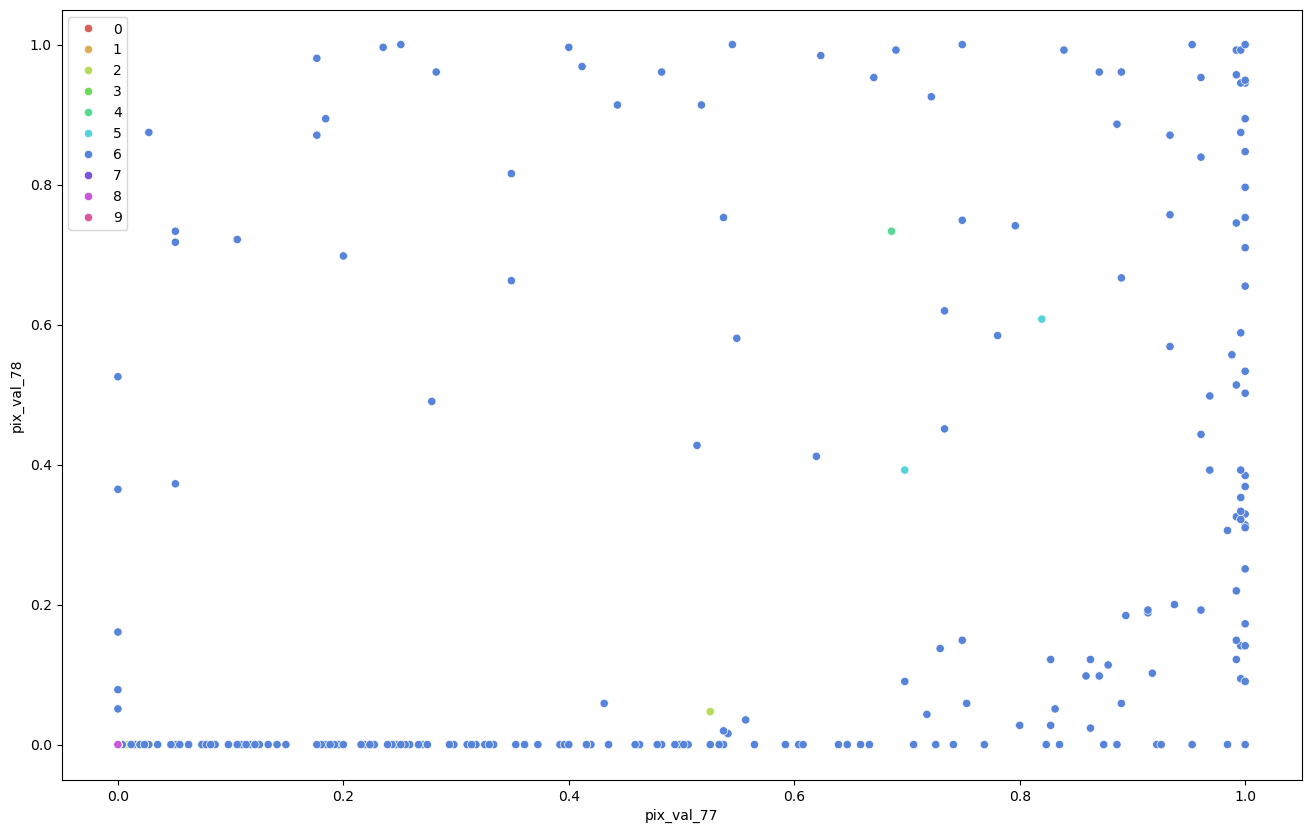

In [112]:
plt.figure(figsize=(16, 10))
color = sns.color_palette("hls", 10)
sns.scatterplot(x="pix_val_77", y="pix_val_78", hue="actual_class",  palette=color, data = pixel_df, legend="full")
plt.legend(loc='upper left');

## PCA Feature Reduction / Model Optimization

## Use PCA decomposition to reduce the number of features from 784 features to 2 features

In [113]:
# Separating out the features
features = [*pixel_data][1:] # ['pix_val_0', 'pix_val_1',...]
x = pixel_df.loc[:, features].values 

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [114]:
pixel_pca_df = pd.concat([principalDf, pixel_df[['actual_class']]], axis = 1)

In [115]:
pixel_pca_df.head().round(3)

principal component 1  principal component 2  actual_class
0                  0.725                 -2.433             7
1                  0.473                  1.005             3
2                 -0.094                 -3.010             4
3                  0.221                 -0.725             6
4                 -3.680                  2.086             1

In [116]:
pca.explained_variance_ratio_

array([0.097, 0.071], dtype=float32)

## Use a scatter plot to visualize the predictive power of the two principal component values.

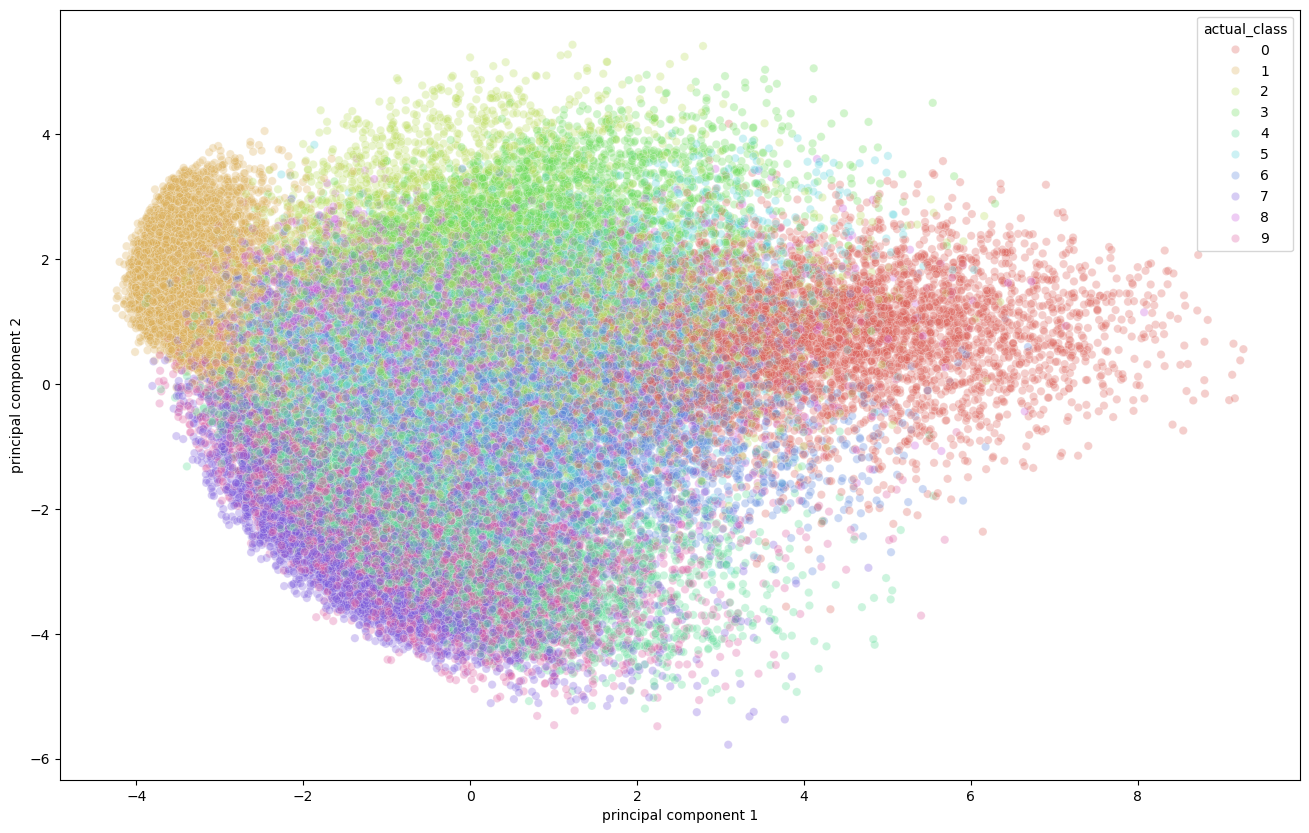

In [117]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="actual_class",
    palette=sns.color_palette("hls", 10),
    data=pixel_pca_df,
    legend="full",
    alpha=0.3
);

### Use PCA decomposition to reduce the (activation) features from 128 (= num of hidden nodes) to 2

In [118]:
# Separating out the features
features = [*activation_data][1:] # ['act_val_0', 'act_val_1',...]
x = activation_df.loc[:, features].values 

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head().round(3)

principal component 1  principal component 2
0                  3.083                 -5.110
1                 -4.171                 -2.838
2                 -2.879                 -9.016
3                 -3.293                  4.458
4                -12.114                  4.780

In [119]:
activation_pca_df = pd.concat([principalDf, activation_df[['actual_class']]], axis = 1)
activation_pca_df.head().round(3)

principal component 1  principal component 2  actual_class
0                  3.083                 -5.110             7
1                 -4.171                 -2.838             3
2                 -2.879                 -9.016             4
3                 -3.293                  4.458             6
4                -12.114                  4.780             1

In [134]:
ev=pca.explained_variance_ratio_
ev

array([0.173, 0.105, 0.086], dtype=float32)

In [135]:
print(f'The {len(ev)} principal components summed together {ev[0]:.3f} + {ev[1]:.3f} = {sum(ev):.3f} explained variance')

The 3 principal components summed together 0.173 + 0.105 = 0.364 explained variance


## Use a scatter plot to visualize the predictive power of *two* principal component values.

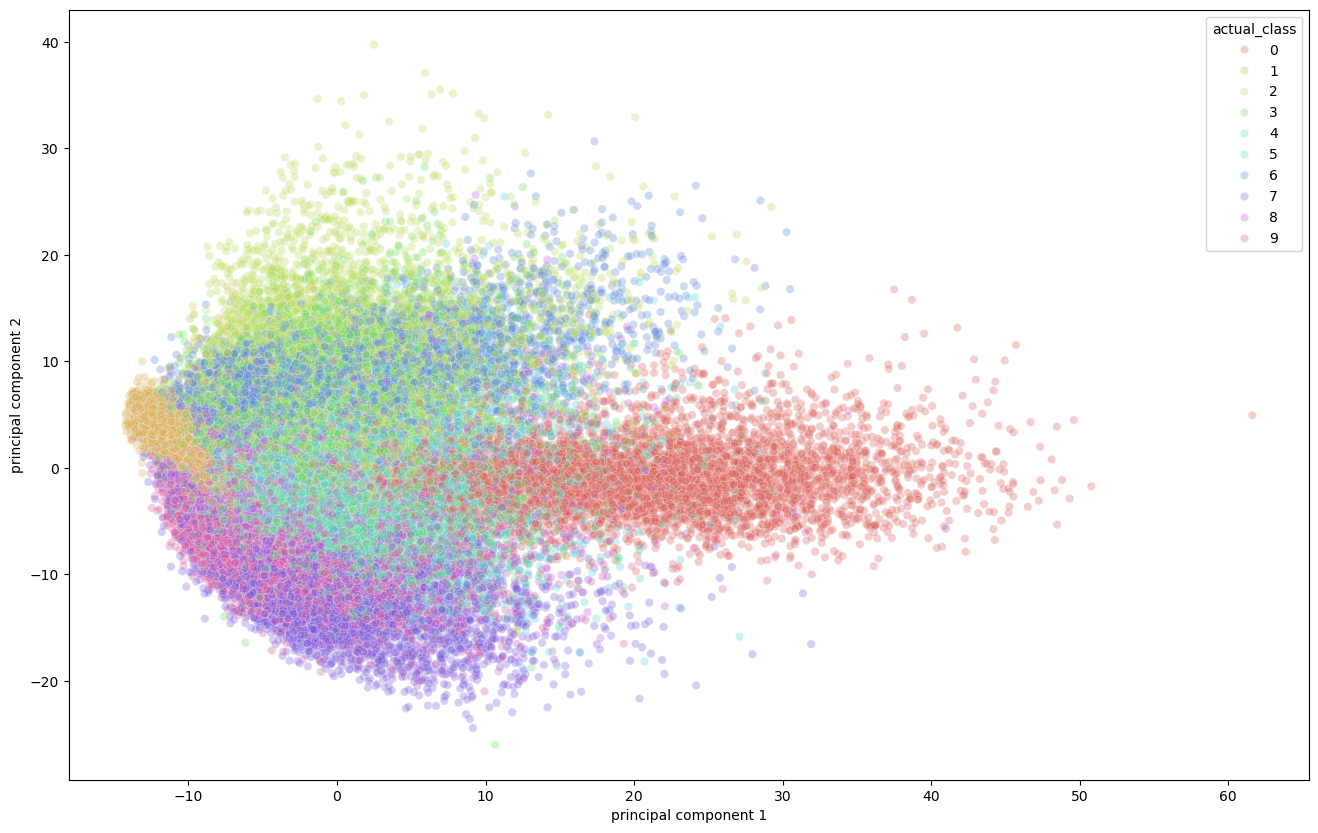

In [121]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="actual_class",
    palette=sns.color_palette("hls", 10),
    data=activation_pca_df,
    legend="full",
    alpha=0.3
);

### Use PCA decomposition to reduce the (activation) features from 128 (= num of hidden nodes) to 3

In [122]:
# Separating out the features
features = [*activation_data][1:] # ['act_val_0', 'act_val_1',...]
x = activation_df.loc[:, features].values 

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pca-one', 'pca-two', 'pca-three'])
principalDf.head(10).round(3).T

0      1      2      3       4      5       6          7  \
pca-one    3.083 -4.171 -2.879 -3.293 -12.114 -0.279 -12.835  26.379999   
pca-two   -5.110 -2.838 -9.016  4.458   4.780 -5.871   4.898  -3.498000   
pca-three  6.858  5.308  2.859 -6.644  -2.873 -4.216  -2.296  -7.278000   

               8      9  
pca-one   -3.024  1.489  
pca-two   -7.683  1.781  
pca-three  5.430 -1.221

In [136]:
ev=pca.explained_variance_ratio_
ev

array([0.173, 0.105, 0.086], dtype=float32)

In [137]:
print(f'The {len(ev)} principal components summed together {ev[0]:.3f} + {ev[1]:.3f} + {ev[2]:.3f} = {sum(ev):.3f} explained variance')

The 3 principal components summed together 0.173 + 0.105 + 0.086 = 0.364 explained variance


In [124]:
activation_pca_df = pd.concat([principalDf, activation_df[['actual_class']]], axis = 1)
activation_pca_df.head().round(3)

pca-one  pca-two  pca-three  actual_class
0    3.083   -5.110      6.858             7
1   -4.171   -2.838      5.308             3
2   -2.879   -9.016      2.859             4
3   -3.293    4.458     -6.644             6
4  -12.114    4.780     -2.873             1

## Use t-Distributed Stochastic Neighbor Embedding (**t-SNE**)  to reduce the (activation) features from 128 (= num of hidden nodes) to 2

`t-Distributed Stochastic Neighbor Embedding` (**t-SNE**) is another technique for dimensionality reduction and is particularly well suited for the visualization of high-dimensional datasets. This time we only use the first 10,000 training images (N=10000) since the technique is computationally expensive.

See http://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf

In [125]:
activation_df.shape

(55000, 129)

In [126]:
N=55000
activation_df_subset = activation_df.iloc[:N].copy()
activation_df_subset.shape

(55000, 129)

In [127]:
data_subset = activation_df_subset[features].values
data_subset.shape

(55000, 128)

In [128]:
%%time
tsne = TSNE(n_components=2 # sorts nodes in ascending order,
            ,init='pca'
            ,learning_rate='auto'
            ,verbose=1
            ,perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 55000 samples in 0.014s...
[t-SNE] Computed neighbors for 55000 samples in 5.813s...
[t-SNE] Computed conditional probabilities for sample 1000 / 55000
[t-SNE] Computed conditional probabilities for sample 2000 / 55000
[t-SNE] Computed conditional probabilities for sample 3000 / 55000
[t-SNE] Computed conditional probabilities for sample 4000 / 55000
[t-SNE] Computed conditional probabilities for sample 5000 / 55000
[t-SNE] Computed conditional probabilities for sample 6000 / 55000
[t-SNE] Computed conditional probabilities for sample 7000 / 55000
[t-SNE] Computed conditional probabilities for sample 8000 / 55000
[t-SNE] Computed conditional probabilities for sample 9000 / 55000
[t-SNE] Computed conditional probabilities for sample 10000 / 55000
[t-SNE] Computed conditional probabilities for sample 11000 / 55000
[t-SNE] Computed conditional probabilities for sample 12000 / 55000
[t-SNE] Computed conditional probabilities for sa

In [129]:
tsne_results = (tsne_results - tsne_results.min()) / (tsne_results.max() - tsne_results.min())

In [130]:
tsne_results

array([[0.337, 0.343],
       [0.435, 0.774],
       [0.663, 0.155],
       ...,
       [0.711, 0.525],
       [0.689, 0.844],
       [0.385, 0.399]], dtype=float32)

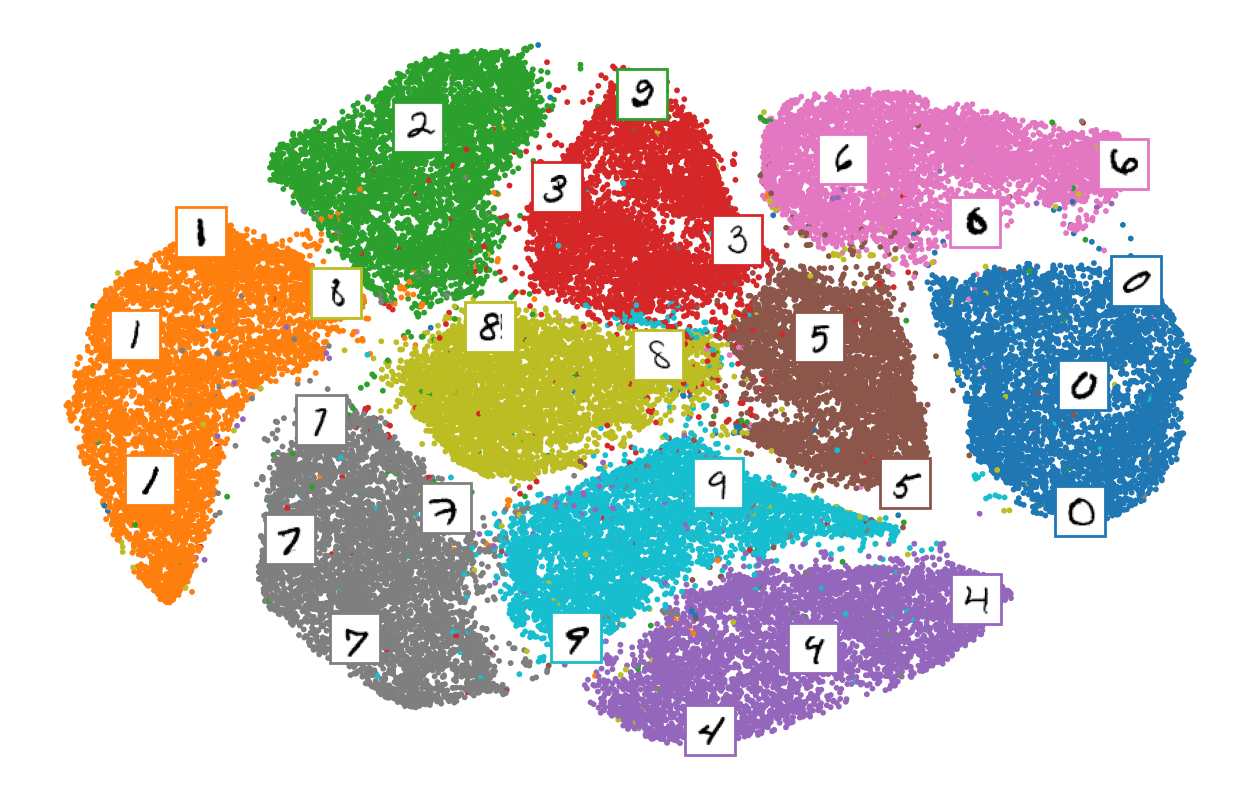

In [131]:
cmap = plt.cm.tab10
plt.figure(figsize=(16,10))
plt.scatter(tsne_results[:,0],tsne_results[:,1], c=train_labels, s=10, cmap=cmap)

image_positions = np.array([[1., 1.]])
for index, position in enumerate(tsne_results):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(train_images[index].reshape(28,28), cmap="binary"),
            position, bboxprops={"edgecolor": cmap(train_labels[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
plt.show()

## Experiment 4

- 28x28 images (784 pixels) reduced to 154 input nodes via PCA (n_components=0.95)
- hidden layer: 85 nodes
- output layer: 10 nodes


In [138]:
pca = PCA(n_components=0.95)
train_images_red = pca.fit_transform(train_images)
val_images_red = pca.transform(val_images)
test_images_red = pca.transform(test_images)

In [139]:
test_images_red.shape, train_images_red.shape, val_images_red.shape

((10000, 154), (55000, 154), (5000, 154))

In [140]:
#k.clear_session()

model = Sequential([
    Dense(name = 'hidden_layer_1', units=85, activation='relu', input_shape=[154]),
    Dense(name = 'output_layer', units = 10, activation ='softmax')
])

## Build the DNN model

In [113]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 85)                13175     
                                                                 
 output_layer (Dense)        (None, 10)                860       
                                                                 
Total params: 14,035
Trainable params: 14,035
Non-trainable params: 0
_________________________________________________________________


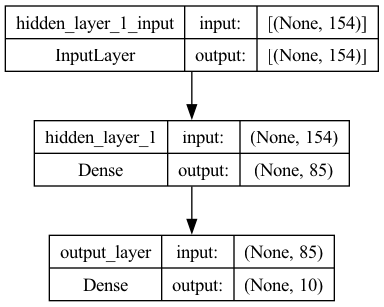

In [141]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True)

## Compile the DNN model

In [142]:
model.compile(optimizer='rmsprop',
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy'])

## Train the DNN model

In [143]:
history = model.fit(train_images_red
    , train_labels
    , epochs=15
    , validation_data=(val_images_red, val_labels)
    , callbacks=[tf.keras.callbacks.ModelCheckpoint("exp_4_optimized.h5",save_best_only=True,save_weights_only=False)] 
    )

Epoch 1/15
1719/1719 [==============================] - 1s 377us/step - loss: 0.3528 - accuracy: 0.9031 - val_loss: 0.1568 - val_accuracy: 0.9570
Epoch 2/15
1719/1719 [==============================] - 1s 333us/step - loss: 0.1375 - accuracy: 0.9600 - val_loss: 0.1139 - val_accuracy: 0.9670
Epoch 3/15
1719/1719 [==============================] - 1s 340us/step - loss: 0.0971 - accuracy: 0.9719 - val_loss: 0.0980 - val_accuracy: 0.9720
Epoch 4/15
1719/1719 [==============================] - 1s 342us/step - loss: 0.0743 - accuracy: 0.9785 - val_loss: 0.0890 - val_accuracy: 0.9764
Epoch 5/15
1719/1719 [==============================] - 1s 392us/step - loss: 0.0592 - accuracy: 0.9831 - val_loss: 0.0813 - val_accuracy: 0.9764
Epoch 6/15
1719/1719 [==============================] - 1s 369us/step - loss: 0.0486 - accuracy: 0.9865 - val_loss: 0.0792 - val_accuracy: 0.9762
Epoch 7/15
1719/1719 [==============================] - 1s 331us/step - loss: 0.0403 - accuracy: 0.9889 - val_loss: 0.0817 -

In [144]:
model = tf.keras.models.load_model("exp_4_optimized.h5")

## Evaluate the DNN model

In [145]:
test_loss, test_acc = model.evaluate(test_images_red, test_labels)

313/313 [==============================] - 0s 275us/step - loss: 0.0886 - accuracy: 0.9755


In [146]:
print(f'test acc: {test_acc}, test loss: {test_loss}')

test acc: 0.9754999876022339, test loss: 0.08862930536270142


## Plot performance metrics

In [147]:
history_dict = history.history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

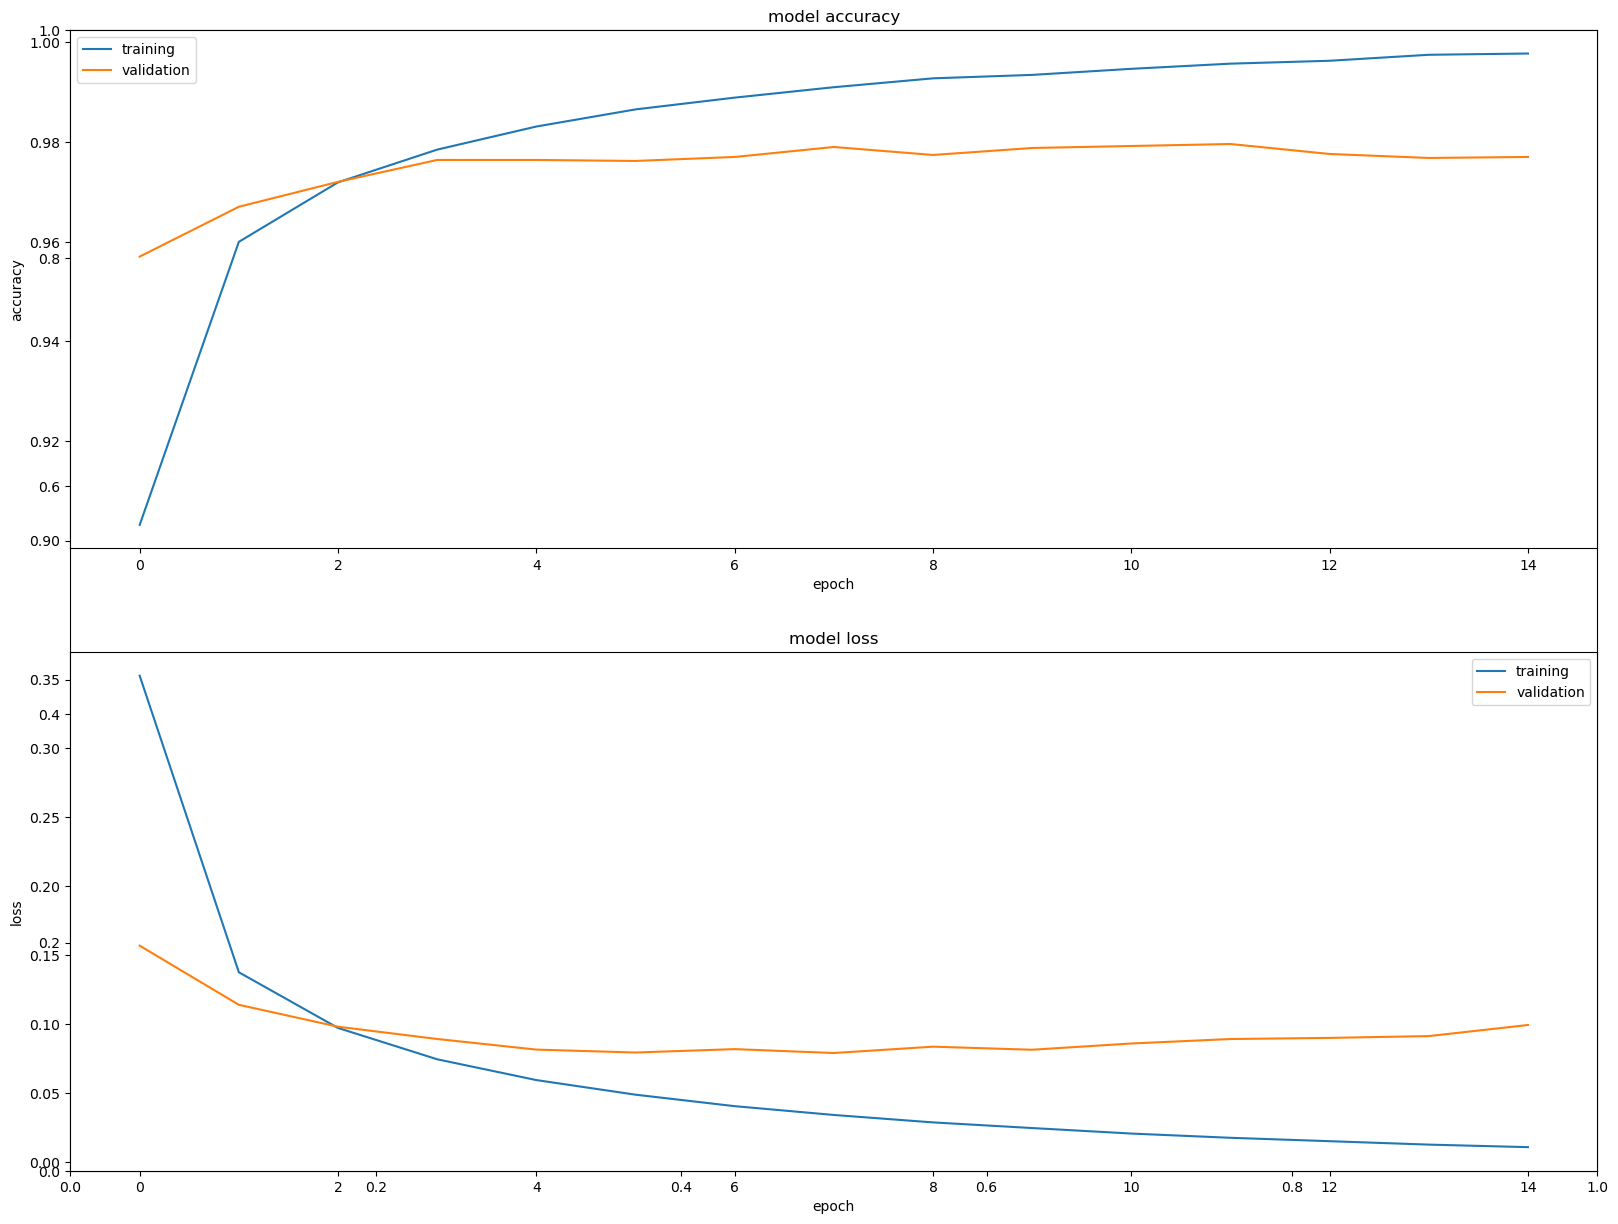

In [148]:
plt.subplots(figsize=(16,12))
plt.tight_layout()
display_training_curves(history_dict['accuracy'], history_dict['val_accuracy'], 'accuracy', 211)
display_training_curves(history_dict['loss'], history_dict['val_loss'], 'loss', 212)

## Making Predictions

In [149]:
# Get the predicted classes:
# model.predict_classes() is depricated in TensorFlow 2.7+
# pred_classes = model.predict(train_images)
# alternate method:
pred_train=model.predict(train_images_red) 
pred_classes=np.argmax(pred_train, axis=1)

1719/1719 [==============================] - 0s 205us/step


In [150]:
print_validation_report(train_labels, pred_classes)

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5444
           1       1.00      1.00      1.00      6179
           2       0.99      1.00      0.99      5470
           3       1.00      0.99      0.99      5638
           4       0.99      0.99      0.99      5307
           5       1.00      1.00      1.00      4987
           6       1.00      1.00      1.00      5417
           7       0.99      1.00      0.99      5715
           8       0.99      1.00      0.99      5389
           9       0.99      0.99      0.99      5454

    accuracy                           0.99     55000
   macro avg       0.99      0.99      0.99     55000
weighted avg       0.99      0.99      0.99     55000

Accuracy Score: 0.9946545454545455
Root Mean Square Error: 0.3266914028977082


## Create the confusion matrix

In [151]:
conf_mx = tf.math.confusion_matrix(train_labels, pred_classes)
conf_mx;

In [152]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)
df = pd.DataFrame(pred_train[0:20], columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

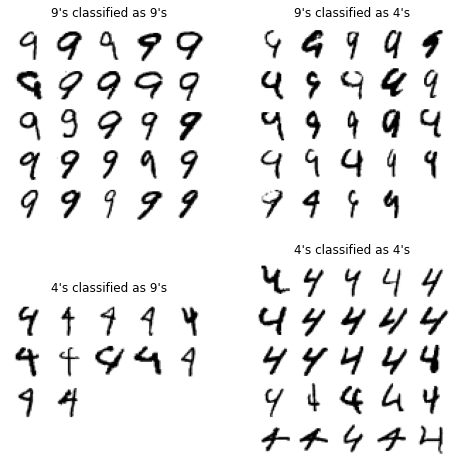

In [128]:
cl_a, cl_b = 9, 4
X_aa = train_images[(train_labels == cl_a) & (pred_classes == cl_a)]
X_ab = train_images[(train_labels == cl_a) & (pred_classes == cl_b)]
X_ba = train_images[(train_labels == cl_b) & (pred_classes == cl_a)]
X_bb = train_images[(train_labels == cl_b) & (pred_classes == cl_b)]

plt.figure(figsize=(8,8))

p1 = plt.subplot(221)
p2 = plt.subplot(222)
p3 = plt.subplot(223)
p4 = plt.subplot(224)

plot_digits(X_aa[:25], p1, images_per_row=5);
plot_digits(X_ab[:25], p2, images_per_row=5);
plot_digits(X_ba[:25], p3, images_per_row=5);
plot_digits(X_bb[:25], p4, images_per_row=5);


p1.set_title(f"{cl_a}'s classified as {cl_a}'s")
p2.set_title(f"{cl_a}'s classified as {cl_b}'s")
p3.set_title(f"{cl_b}'s classified as {cl_a}'s")
p4.set_title(f"{cl_b}'s classified as {cl_b}'s")

# plt.savefig("error_analysis_digits_plot_EXP1_valid")

plt.show()

 ## Get Activation Values of the Hidden Nodes (128)

In [153]:
# Extracts the outputs of the 2 layers:
layer_outputs = [layer.output for layer in model.layers]

In [154]:
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [155]:
print(f"There are {len(layer_outputs)} layers")
layer_outputs; # description of the layers

There are 2 layers


In [156]:
# Get the outputs of all the hidden nodes for each of the 60000 training images
activations = activation_model.predict(train_images_red)
hidden_layer_activation = activations[0]
output_layer_activations = activations[1]
hidden_layer_activation.shape   #  each of the 85 hidden nodes has one activation value per training image


1719/1719 [==============================] - 0s 232us/step


(55000, 85)

In [157]:
output_layer_activations.shape


(55000, 10)

In [158]:
print(f"The maximum activation value of the hidden nodes in the hidden layer is \
{hidden_layer_activation.max()}")

The maximum activation value of the hidden nodes in the hidden layer is 10.835199356079102


In [159]:
# Some stats about the output layer as an aside...
np.set_printoptions(suppress = True)  # display probabilities as decimals and NOT in scientific notation
ouput_layer_activation = activations[1]
print(f"The output node has shape {ouput_layer_activation.shape}")
print(f"The output for the first image are {ouput_layer_activation[0].round(4)}")
print(f"The sum of the probabilities is (approximately) {ouput_layer_activation[0].sum()}")


The output node has shape (55000, 10)
The output for the first image are [0.    0.    0.023 0.115 0.    0.    0.    0.861 0.    0.001]
The sum of the probabilities is (approximately) 1.0


 ## Create a dataframe with the activation values and the class labels

In [160]:
#Get the dataframe of all the node values
activation_data = {'actual_class':train_labels}
for k in range(0,85): 
    activation_data[f"act_val_{k}"] = hidden_layer_activation[:,k]

activation_df = pd.DataFrame(activation_data)
activation_df.head(15).round(3).T

0      1      2      3      4      5      6      7      8   \
actual_class  7.000  3.000  4.000  6.000  1.000  8.000  1.000  0.000  9.000   
act_val_0     1.213  0.000  0.000  0.000  0.000  0.000  0.000  0.000  1.544   
act_val_1     0.000  0.000  0.000  0.000  0.000  1.242  0.000  1.080  0.831   
act_val_2     2.333  2.651  2.632  1.823  0.000  0.000  0.000  1.037  1.634   
act_val_3     0.000  0.000  0.000  2.431  0.000  1.206  0.000  1.903  0.000   
...             ...    ...    ...    ...    ...    ...    ...    ...    ...   
act_val_80    0.000  0.342  0.000  0.000  2.200  0.832  2.338  0.000  0.000   
act_val_81    1.221  2.126  0.000  0.000  1.058  0.456  1.439  0.000  0.000   
act_val_82    1.029  0.000  1.005  0.000  0.000  1.133  0.000  2.450  0.000   
act_val_83    0.255  0.000  1.721  0.050  0.821  1.020  2.151  0.000  1.270   
act_val_84    1.972  0.000  0.766  0.260  0.000  0.000  0.000  1.290  3.077   

                 9      10     11     12     13     14  
actual_class  8.000  0.000  3.000  1.000  2.000  7.000  
act_val_0     0.000  1.773  0.000  0.000  1.705  1.105  
act_val_1     0.267  0.115  0.000  0.000  0.000  1.720  
act_val_2     0.000  0.000  0.000  0.000  1.047  0.815  
act_val_3     0.183  3.239  0.000  0.000  0.000  0.232  
...             ...    ...    ...    ...    ...    ...  
act_val_80    0.806  0.396  0.208  1.846  0.000  0.000  
act_val_81    1.381  0.000  1.960  1.340  0.000  2.734  
act_val_82    2.166  3.468  1.295  0.000  3.504  0.000  
act_val_83    0.000  0.000  0.000  0.248  0.000  0.000  
act_val_84    0.479  4.508  0.474  0.000  1.063  0.000  

[86 rows x 15 columns]

 ## Visualize the activation values with boxplots

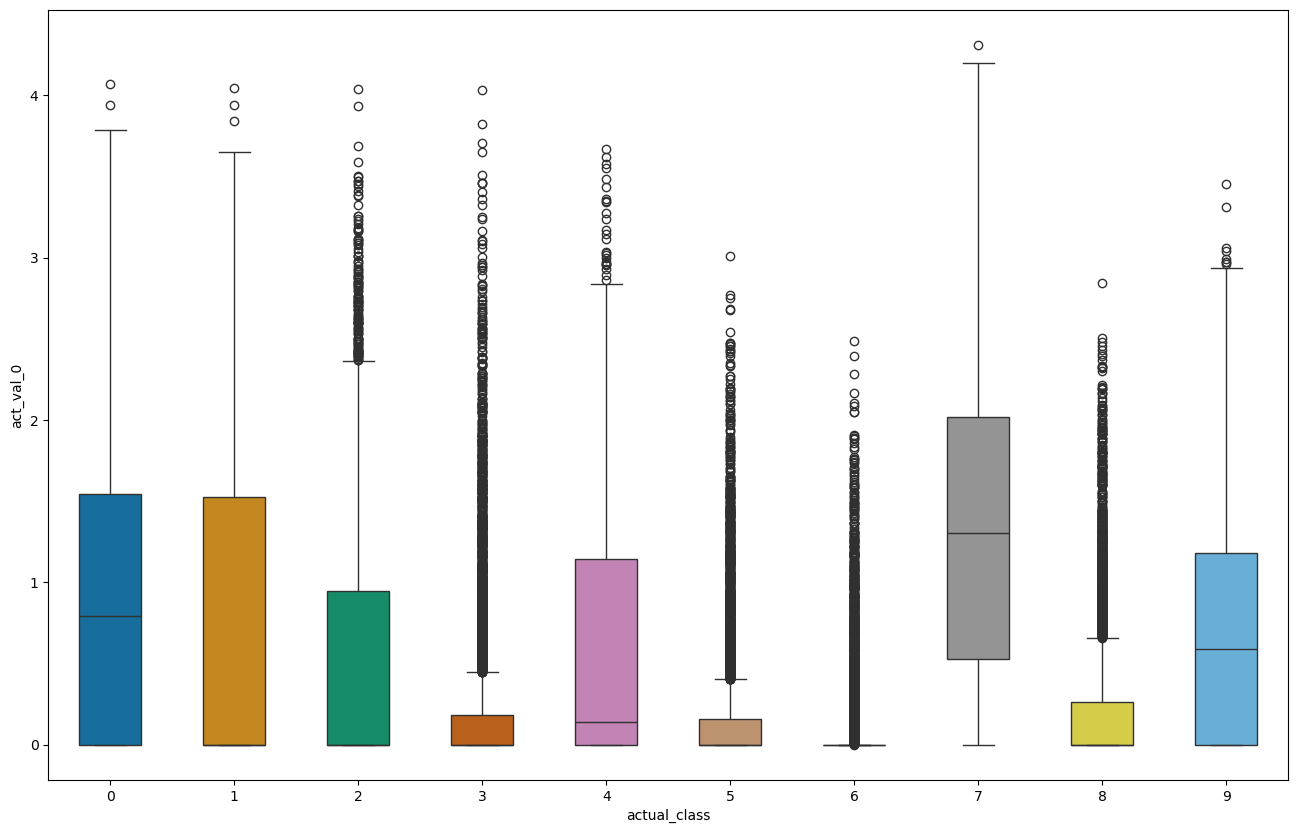

In [161]:
# To see how closely the hidden node activation values correlate with the class labels
# Let us use seaborn for the boxplots this time.
plt.figure(figsize=(16,10))
bplot = sns.boxplot(y='act_val_0', x='actual_class', 
                 data=activation_df[['act_val_0','actual_class']], 
                 width=0.5,
                 palette="colorblind")

## Displaying The Range Of Activation Values For Each Class Labels

In [162]:
activation_df.groupby("actual_class")["act_val_0"].apply(lambda x: [round(min(x.tolist()),2),
 round(max(x.tolist()),2)]).reset_index().rename(columns={"act_val_0": "range_of_act_values"})


actual_class range_of_act_values
0             0         [0.0, 4.07]
1             1         [0.0, 4.05]
2             2         [0.0, 4.04]
3             3         [0.0, 4.03]
4             4         [0.0, 3.67]
5             5         [0.0, 3.01]
6             6         [0.0, 2.48]
7             7         [0.0, 4.31]
8             8         [0.0, 2.85]
9             9         [0.0, 3.46]

## Get Activation Values of the Pixel Values (784)

 ## Create a dataframe with the pixel values and class labels

In [163]:
#Get the dataframe of all the pixel values
pixel_data = {'actual_class':train_labels}
for k in range(0,154): 
    pixel_data[f"pix_val_{k}"] = train_images_red[:,k]
pixel_df = pd.DataFrame(pixel_data)
pixel_df.head(15).round(3).T


0      1      2      3      4      5      6      7      8   \
actual_class  7.000  3.000  4.000  6.000  1.000  8.000  1.000  0.000  9.000   
pix_val_0     0.725  0.473 -0.094  0.221 -3.679  1.303 -3.645  6.441 -0.511   
pix_val_1    -2.433  1.005 -3.010 -0.725  2.086  0.938  2.637  0.618 -2.159   
pix_val_2     1.537  0.502  2.129 -2.279 -0.551 -1.222 -0.458 -1.207  2.395   
pix_val_3    -2.445  3.738  0.838 -1.903 -0.906  2.802 -0.120  0.589 -0.949   
...             ...    ...    ...    ...    ...    ...    ...    ...    ...   
pix_val_149   0.242  0.161  0.033 -0.102 -0.082 -0.114  0.094  0.166 -0.262   
pix_val_150  -0.115 -0.105 -0.006  0.040 -0.061  0.050 -0.130 -0.191 -0.010   
pix_val_151  -0.367 -0.218  0.013  0.048 -0.117 -0.117  0.116 -0.141  0.022   
pix_val_152  -0.063  0.148  0.125 -0.071  0.007  0.083 -0.046  0.120  0.017   
pix_val_153  -0.264  0.007 -0.035  0.028  0.021 -0.087  0.055  0.071  0.183   

                 9      10     11     12     13     14  
actual_class  8.000  0.000  3.000  1.000  2.000  7.000  
pix_val_0     1.735  5.038  0.703 -3.438  3.187 -1.907  
pix_val_1     2.033  1.001  2.985  0.737  1.372 -1.918  
pix_val_2     0.174  1.917  1.507  0.137  0.066  0.498  
pix_val_3     1.990 -0.634  1.158 -0.161  2.586 -0.127  
...             ...    ...    ...    ...    ...    ...  
pix_val_149  -0.170  0.033 -0.044 -0.011 -0.184 -0.051  
pix_val_150  -0.439  0.139  0.018  0.115  0.028 -0.050  
pix_val_151  -0.228 -0.135  0.150  0.002  0.108 -0.111  
pix_val_152   0.283 -0.077  0.002  0.080  0.006  0.256  
pix_val_153   0.041 -0.132  0.142 -0.173  0.105  0.268  

[155 rows x 15 columns]

In [164]:
pixel_df.pix_val_77.value_counts()


pix_val_77
 0.233526    2
 0.222589    2
-0.106621    2
 0.335311    2
 0.372639    2
            ..
-0.097114    1
-0.040634    1
 0.232502    1
 0.125765    1
 0.271186    1
Name: count, Length: 54958, dtype: int64

In [165]:
pixel_df.pix_val_78.value_counts()


pix_val_78
 0.301367    2
-0.072439    2
 0.184436    2
 0.491759    2
-0.225153    2
            ..
-0.054373    1
-0.579701    1
 0.121835    1
 0.007295    1
-0.239521    1
Name: count, Length: 54980, dtype: int64

### Use a scatter plot to visualize the predicive power of the pixel values at two fixed locations in the image, i.e. how well the pixel values at two fixed locations in the image "predict" the class labels.

We use a scatter plot to determine the correlation between the `pix_val_77` and `pix_val_78` values and the `actual_class` values.

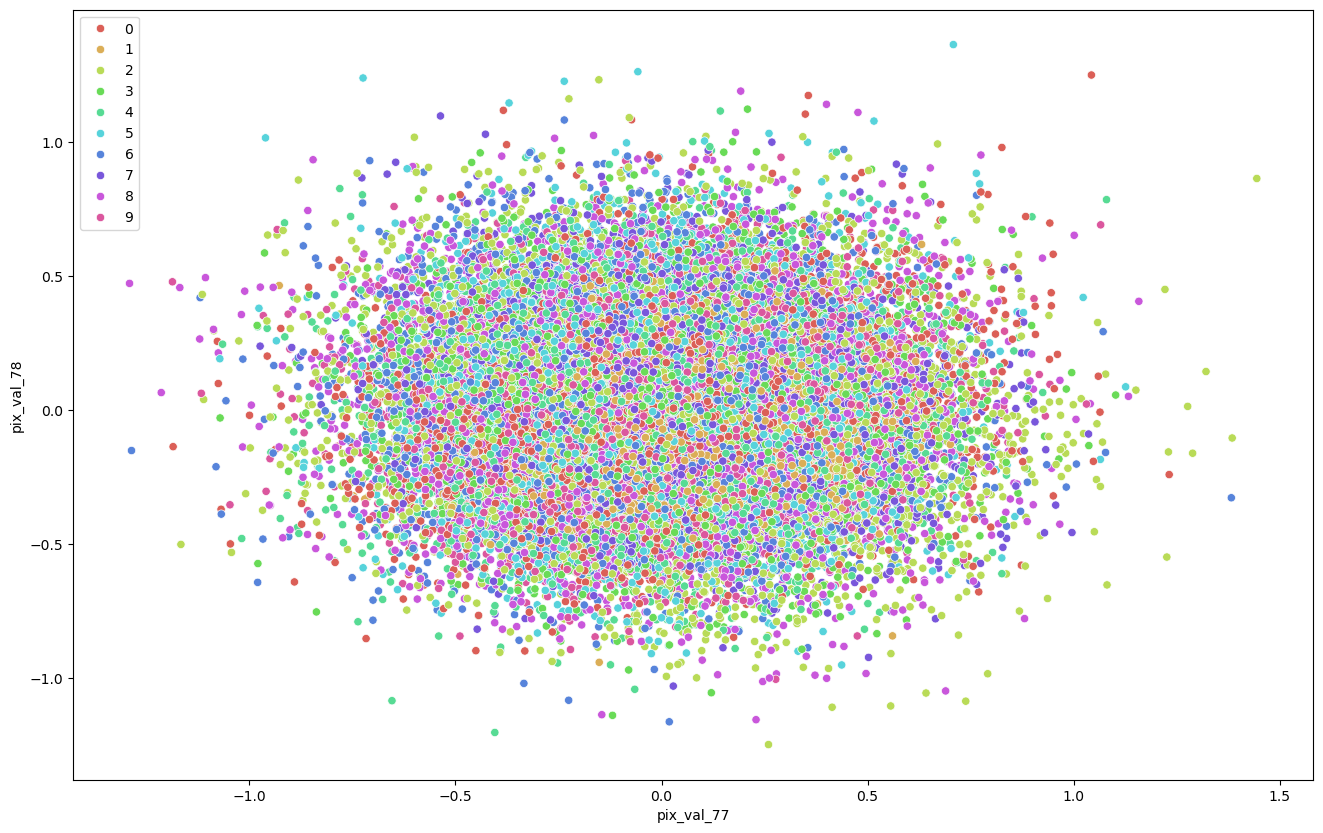

In [166]:
plt.figure(figsize=(16, 10))
color = sns.color_palette("hls", 10)
sns.scatterplot(x="pix_val_77", y="pix_val_78", hue="actual_class",  palette=color, data = pixel_df, legend="full")
plt.legend(loc='upper left');


## PCA Feature Reduction / Model Optimization

## Use PCA decomposition to reduce the number of features from 784 features to 2 features

In [169]:
# Separating out the features
features = [*pixel_data][1:] # ['pix_val_0', 'pix_val_1',...]
x = pixel_df.loc[:, features].values 

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [170]:
pixel_pca_df = pd.concat([principalDf, pixel_df[['actual_class']]], axis = 1)


In [171]:
pixel_pca_df.head().round(3)


principal component 1  principal component 2  actual_class
0                  0.725                 -2.433             7
1                  0.473                  1.005             3
2                 -0.094                 -3.010             4
3                  0.221                 -0.725             6
4                 -3.680                  2.086             1

In [172]:
pca.explained_variance_ratio_


array([0.102, 0.074], dtype=float32)

## Use a scatter plot to visualize the predictive power of the two principal component values.

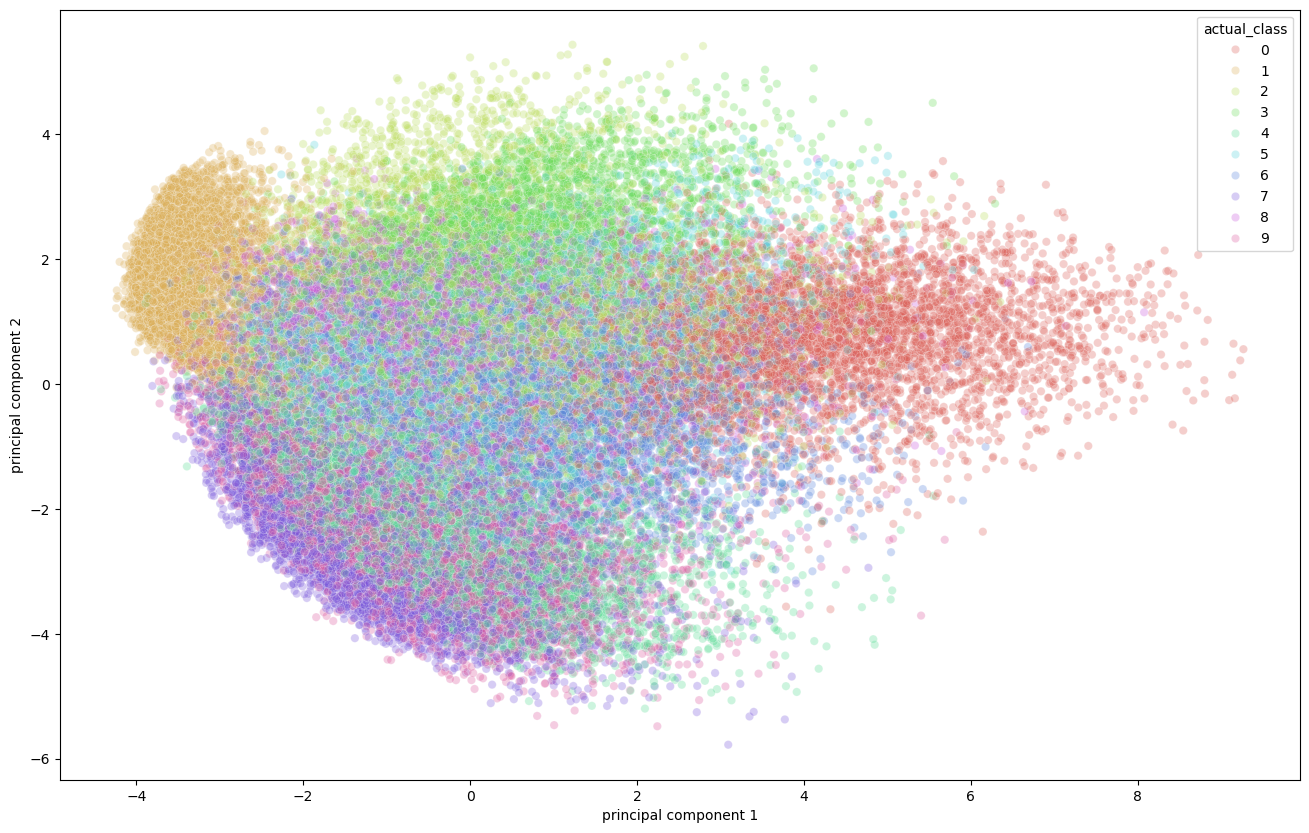

In [173]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="actual_class",
    palette=sns.color_palette("hls", 10),
    data=pixel_pca_df,
    legend="full",
    alpha=0.3
);


### Use PCA decomposition to reduce the (activation) features from 128 (= num of hidden nodes) to 2

In [174]:
# Separating out the features
features = [*activation_data][1:] # ['act_val_0', 'act_val_1',...]
x = activation_df.loc[:, features].values 

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head().round(3)

principal component 1  principal component 2
0                 -0.021                  3.453
1                 -3.112                 -2.194
2                 -0.562                  2.773
3                  2.670                 -0.364
4                 -3.766                 -0.520

In [175]:
activation_pca_df = pd.concat([principalDf, activation_df[['actual_class']]], axis = 1)
activation_pca_df.head().round(3)

principal component 1  principal component 2  actual_class
0                 -0.021                  3.453             7
1                 -3.112                 -2.194             3
2                 -0.562                  2.773             4
3                  2.670                 -0.364             6
4                 -3.766                 -0.520             1

In [176]:
ev=pca.explained_variance_ratio_
ev

array([0.099, 0.093], dtype=float32)

In [177]:
print(f'The {len(ev)} principal components summed together {ev[0]:.3f} + {ev[1]:.3f} = {sum(ev):.3f} explained variance')

The 2 principal components summed together 0.099 + 0.093 = 0.192 explained variance


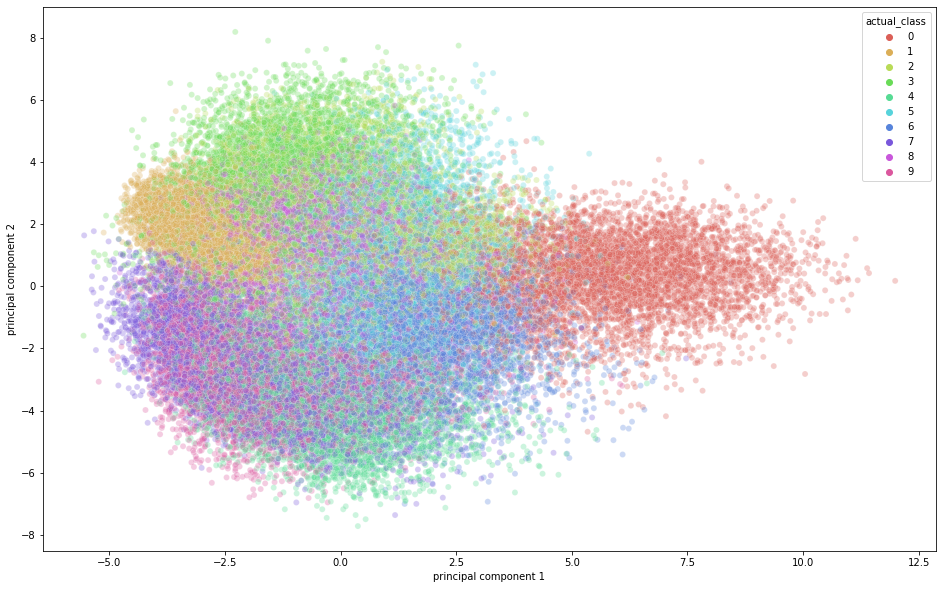

In [151]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="actual_class",
    palette=sns.color_palette("hls", 10),
    data=activation_pca_df,
    legend="full",
    alpha=0.3
);

In [178]:
# Separating out the features
features = [*activation_data][1:] # ['act_val_0', 'act_val_1',...]
x = activation_df.loc[:, features].values 

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pca-one', 'pca-two', 'pca-three'])
principalDf.head(10).round(3).T

0      1      2      3      4      5      6      7      8  \
pca-one   -0.021 -3.112 -0.562  2.670 -3.766 -0.288 -5.192  7.158 -0.342   
pca-two    3.453 -2.194  2.773 -0.364 -0.520 -1.238 -0.849 -1.341  2.366   
pca-three  0.535  0.764  2.086 -2.434 -1.314 -4.054 -2.264  0.980  1.723   

               9  
pca-one   -0.798  
pca-two   -2.745  
pca-three -0.642

In [179]:
ev=pca.explained_variance_ratio_
ev

array([0.099, 0.093, 0.08 ], dtype=float32)

In [180]:
print(f'The {len(ev)} principal components summed together {ev[0]:.3f} + {ev[1]:.3f} = {sum(ev):.3f} explained variance')

The 3 principal components summed together 0.099 + 0.093 = 0.271 explained variance


In [181]:
activation_pca_df = pd.concat([principalDf, activation_df[['actual_class']]], axis = 1)
activation_pca_df.head().round(3)

pca-one  pca-two  pca-three  actual_class
0   -0.021    3.453      0.535             7
1   -3.112   -2.194      0.764             3
2   -0.562    2.773      2.086             4
3    2.670   -0.364     -2.434             6
4   -3.766   -0.520     -1.314             1

## Use t-Distributed Stochastic Neighbor Embedding (**t-SNE**)  to reduce the (activation) features from 128 (= num of hidden nodes) to 2

In [183]:
activation_df.shape

(55000, 86)

In [184]:
N=55000
activation_df_subset = activation_df.iloc[:N].copy()
activation_df_subset.shape

(55000, 86)

In [185]:
data_subset = activation_df_subset[features].values
data_subset.shape

(55000, 85)

In [186]:
%%time
tsne = TSNE(n_components=2 # sorts nodes in ascending order,
# tsne = TSNE(n_components=.95 # get nodes to explain 95% of the variance
            ,init='pca'
            ,learning_rate='auto'
            ,verbose=1
            ,perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 55000 samples in 0.009s...
[t-SNE] Computed neighbors for 55000 samples in 3.589s...
[t-SNE] Computed conditional probabilities for sample 1000 / 55000
[t-SNE] Computed conditional probabilities for sample 2000 / 55000
[t-SNE] Computed conditional probabilities for sample 3000 / 55000
[t-SNE] Computed conditional probabilities for sample 4000 / 55000
[t-SNE] Computed conditional probabilities for sample 5000 / 55000
[t-SNE] Computed conditional probabilities for sample 6000 / 55000
[t-SNE] Computed conditional probabilities for sample 7000 / 55000
[t-SNE] Computed conditional probabilities for sample 8000 / 55000
[t-SNE] Computed conditional probabilities for sample 9000 / 55000
[t-SNE] Computed conditional probabilities for sample 10000 / 55000
[t-SNE] Computed conditional probabilities for sample 11000 / 55000
[t-SNE] Computed conditional probabilities for sample 12000 / 55000
[t-SNE] Computed conditional probabilities for sa

In [187]:
tsne_results = (tsne_results - tsne_results.min()) / (tsne_results.max() - tsne_results.min())


In [189]:
tsne_results


array([[0.393, 0.698],
       [0.227, 0.205],
       [0.756, 0.734],
       ...,
       [0.57 , 0.3  ],
       [0.783, 0.323],
       [0.421, 0.539]], dtype=float32)

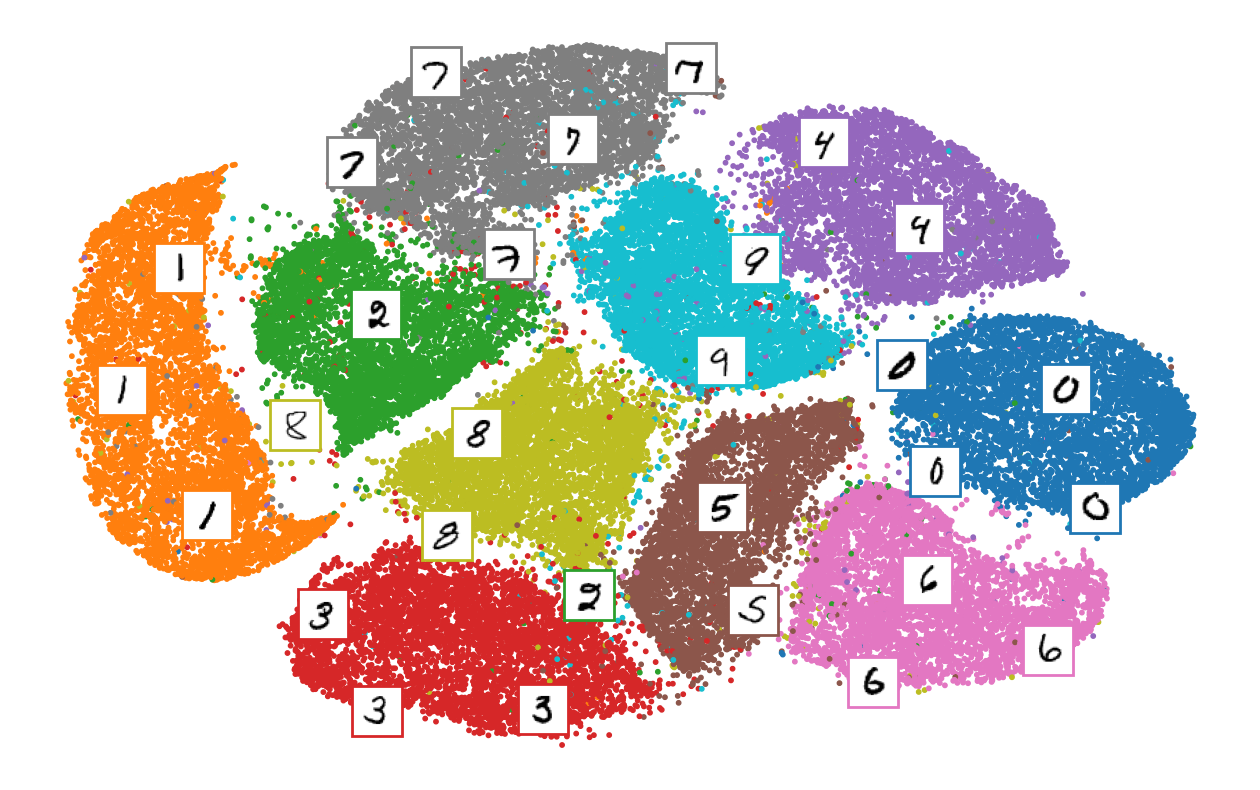

In [188]:
cmap = plt.cm.tab10
plt.figure(figsize=(16,10))
plt.scatter(tsne_results[:,0],tsne_results[:,1], c=train_labels, s=10, cmap=cmap)

image_positions = np.array([[1., 1.]])
for index, position in enumerate(tsne_results):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(train_images[index].reshape(28,28), cmap="binary"),
            position, bboxprops={"edgecolor": cmap(train_labels[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
plt.show()

## Experiment 5

- 28x28 images (784 pixels) dimensionality reduction via random forests
- hidden layer: 85 nodes
- output layer: 10 nodes


## Reducing dimensionality of the data with Random Forests.

We create a Random Forest Classifier (with the default 100 trees) and use it to find the relative importance of the 784 features (pixels) in the training set. We produce a heat map to visual the relative importance of the features (using code from Hands On Machine Learning by A. Geron). Finally, we select the 70 most important feature (pixels) from the training, validation and test images to test our 'best' model on.

In [190]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(train_images,train_labels)

RandomForestClassifier(random_state=42)

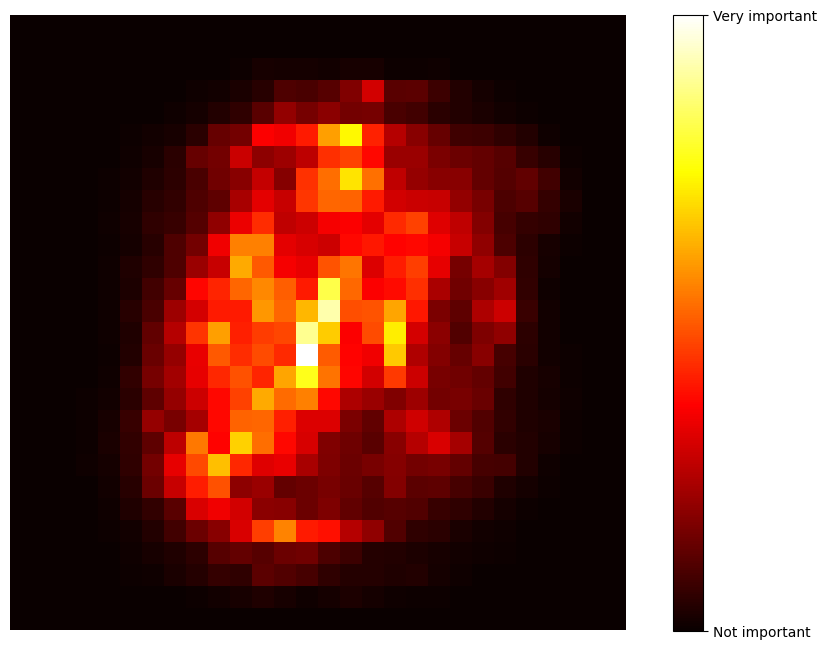

In [191]:
plt.figure(figsize = (12, 8))
plot_digit(rnd_clf.feature_importances_)
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()

In [192]:
n = 70
imp_arr = rnd_clf.feature_importances_
idx = (-imp_arr).argsort()[:n]          # get the indices of the 70 "most important" features/pixels
len(idx)

70

## Create Training and Test Examples Leveraging 70 Pixels

In [193]:
# Create training, validation and test images using just the 70 pixel locations obtained above
train_images_sm = train_images[:,idx]
val_images_sm = val_images[:,idx]
test_images_sm = test_images[:,idx]
train_images_sm.shape, val_images.shape, test_images_sm.shape # the reduced images have dimension 70

((55000, 70), (5000, 784), (10000, 70))

In [194]:
# to convert an index n, 0<= n < 784
def pair(n,size):
    x = n//size 
    y = n%size
    return x,y

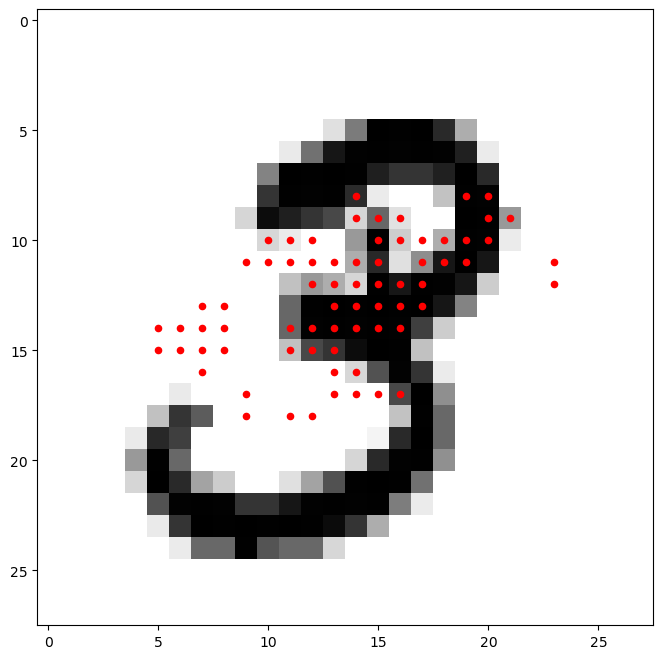

In [196]:
plt.figure(figsize = (12, 8))
plt.imshow(train_images[1].reshape(28,28),cmap='binary')
x, y = np.array([pair(k,28) for k in idx]).T
plt.scatter(x,y,color='red',s=20)

In [197]:
model = Sequential([
    Dense(name = 'hidden_layer_1', units=85, activation='relu', input_shape=(70,)),
    Dense(name = 'output_layer', units = 10, activation ='softmax')
])

## Build the DNN model

In [198]:
model.summary() # prints a summary representation of the odel

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 85)                6035      
                                                                 
 output_layer (Dense)        (None, 10)                860       
                                                                 
Total params: 6,895
Trainable params: 6,895
Non-trainable params: 0
_________________________________________________________________


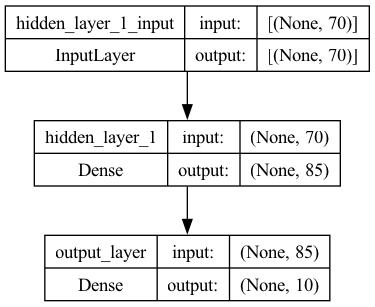

In [199]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True)

## Compile the DNN model

In [200]:
model.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

## Train the DNN model

In [201]:
history = model.fit(train_images_sm
    , train_labels
    , epochs=30
    , validation_data=(val_images_sm, val_labels)
    , callbacks=[tf.keras.callbacks.ModelCheckpoint("exp_5_optimized.h5",save_best_only=True,save_weights_only=False)] 
    )

Epoch 1/30
1719/1719 [==============================] - 1s 366us/step - loss: 0.6135 - accuracy: 0.8179 - val_loss: 0.4263 - val_accuracy: 0.8758
Epoch 2/30
1719/1719 [==============================] - 1s 316us/step - loss: 0.4081 - accuracy: 0.8760 - val_loss: 0.3480 - val_accuracy: 0.8996
Epoch 3/30
1719/1719 [==============================] - 1s 317us/step - loss: 0.3392 - accuracy: 0.8974 - val_loss: 0.3040 - val_accuracy: 0.9150
Epoch 4/30
1719/1719 [==============================] - 1s 314us/step - loss: 0.2989 - accuracy: 0.9099 - val_loss: 0.2762 - val_accuracy: 0.9210
Epoch 5/30
1719/1719 [==============================] - 1s 334us/step - loss: 0.2726 - accuracy: 0.9177 - val_loss: 0.2583 - val_accuracy: 0.9258
Epoch 6/30
1719/1719 [==============================] - 1s 333us/step - loss: 0.2536 - accuracy: 0.9232 - val_loss: 0.2473 - val_accuracy: 0.9300
Epoch 7/30
1719/1719 [==============================] - 1s 361us/step - loss: 0.2398 - accuracy: 0.9276 - val_loss: 0.2384 -

## Evaluate the DNN model

In [202]:
model = tf.keras.models.load_model("exp_5_optimized.h5")
test_loss, test_acc = model.evaluate(test_images_sm, test_labels)

313/313 [==============================] - 0s 273us/step - loss: 0.2126 - accuracy: 0.9367


In [203]:
print(f'test acc: {test_acc}, test loss: {test_loss}')

test acc: 0.9366999864578247, test loss: 0.21263471245765686


##  Reviewing Performance

In [204]:
history_dict = history.history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)


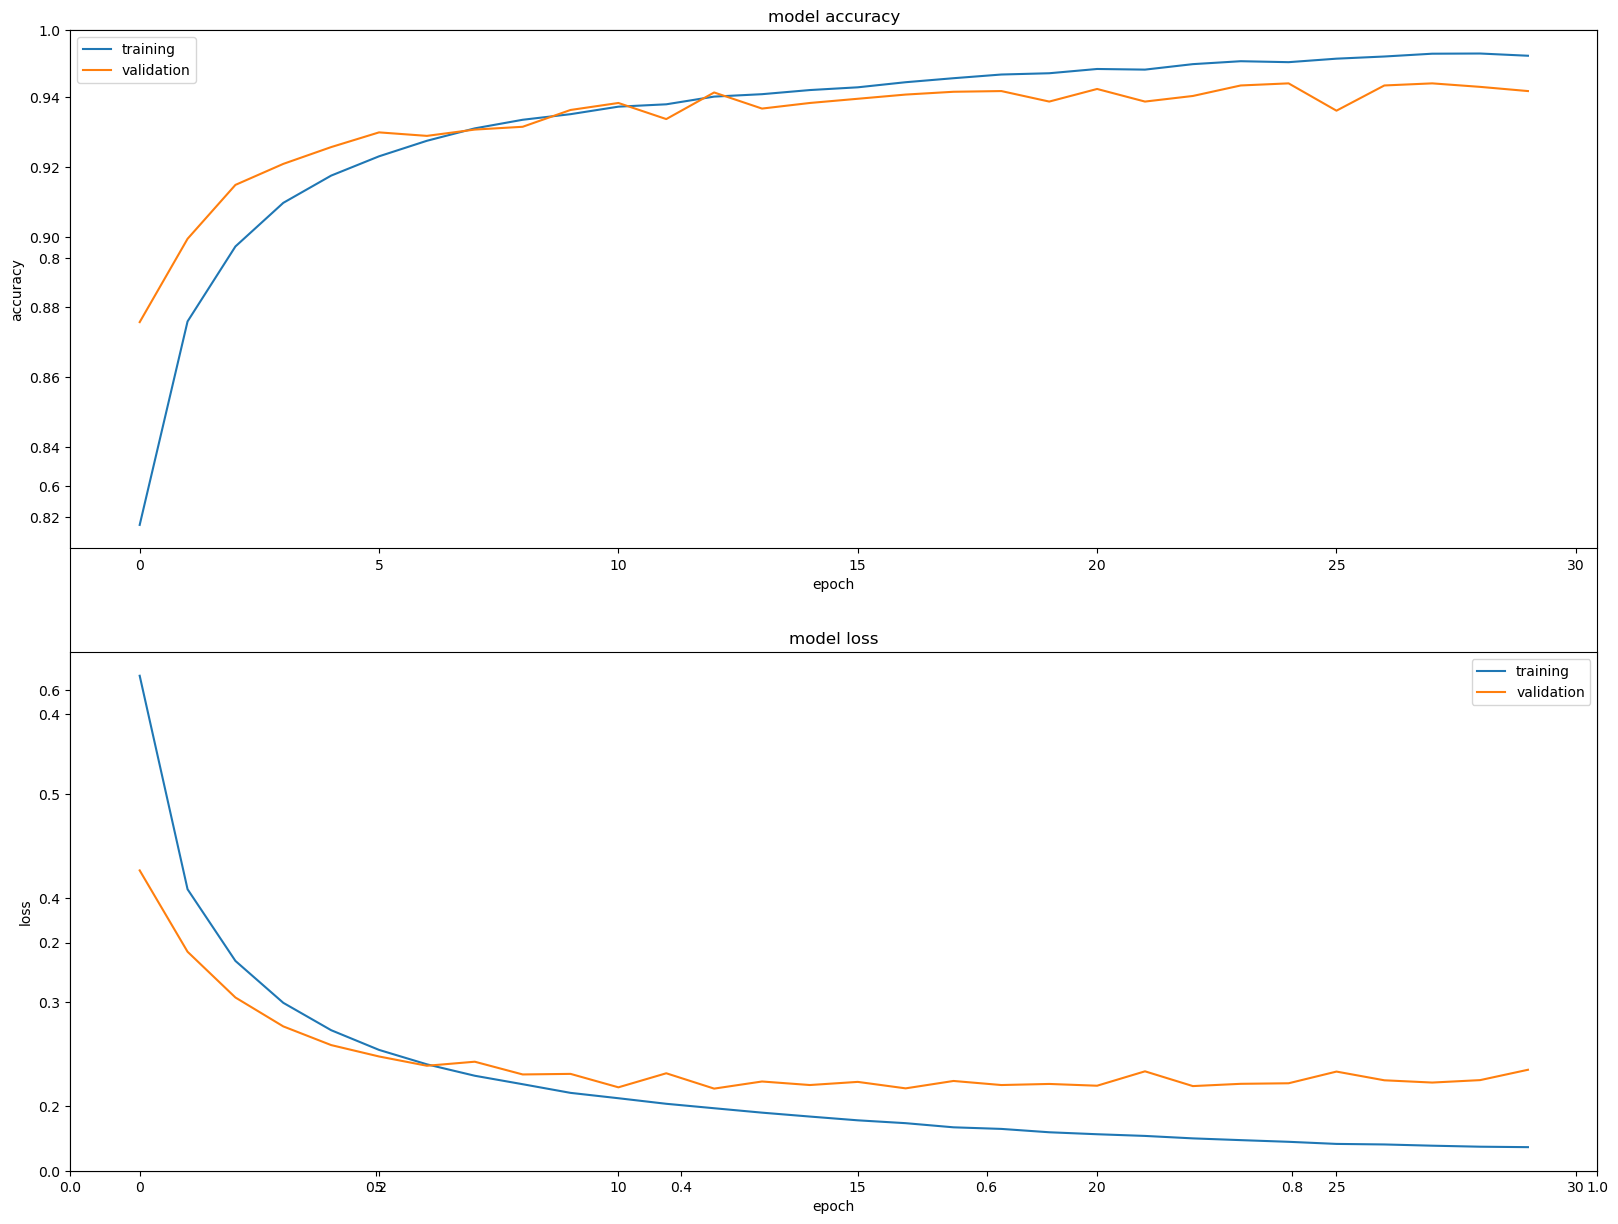

In [205]:
plt.subplots(figsize=(16,12))
plt.tight_layout()
display_training_curves(history_dict['accuracy'], history_dict['val_accuracy'], 'accuracy', 211)
display_training_curves(history_dict['loss'], history_dict['val_loss'], 'loss', 212)

## Making Predictions

In [207]:
# Get the predicted classes:
# model.predict_classes() is depricated in TensorFlow 2.7+
# pred_classes = model.predict(train_images)
# alternate method:
pred_train=model.predict(train_images_sm) 
pred_classes=np.argmax(pred_train, axis=1)

1719/1719 [==============================] - 0s 202us/step


In [208]:
print_validation_report(train_labels, pred_classes)

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      5444
           1       0.98      0.98      0.98      6179
           2       0.92      0.93      0.93      5470
           3       0.95      0.92      0.93      5638
           4       0.96      0.94      0.95      5307
           5       0.93      0.92      0.93      4987
           6       0.95      0.97      0.96      5417
           7       0.95      0.95      0.95      5715
           8       0.93      0.93      0.93      5389
           9       0.91      0.94      0.92      5454

    accuracy                           0.94     55000
   macro avg       0.94      0.94      0.94     55000
weighted avg       0.95      0.94      0.94     55000

Accuracy Score: 0.9448727272727273
Root Mean Square Error: 0.989499414304572


## Create the confusion matrix

In [209]:
conf_mx = tf.math.confusion_matrix(train_labels, pred_classes)
conf_mx;

In [210]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)
df = pd.DataFrame(pred_train[0:20], columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

## Visualize the confusion matrix

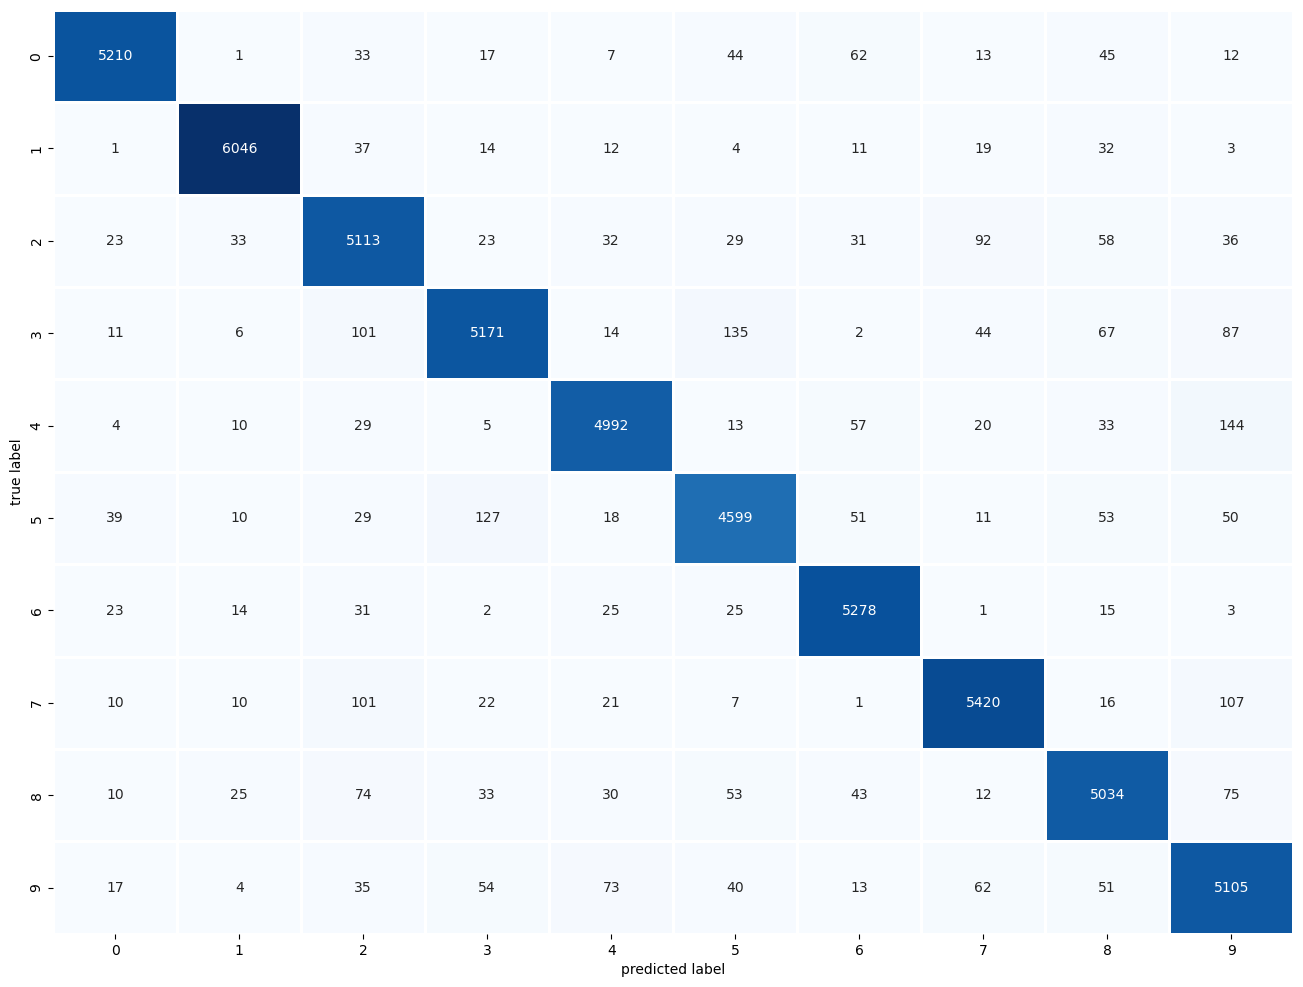

In [211]:
mtx = plot_confusion_matrix(train_labels,pred_classes)

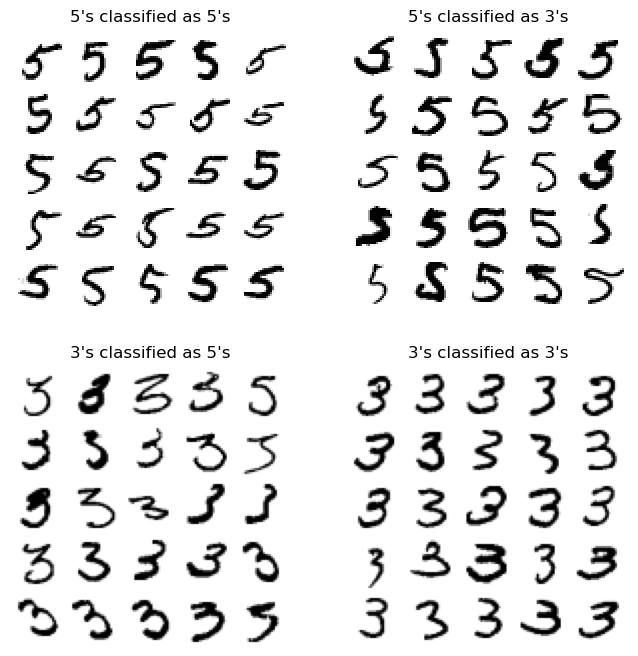

In [214]:
cl_a, cl_b = 5, 3
X_aa = train_images[(train_labels == cl_a) & (pred_classes == cl_a)]
X_ab = train_images[(train_labels == cl_a) & (pred_classes == cl_b)]
X_ba = train_images[(train_labels == cl_b) & (pred_classes == cl_a)]
X_bb = train_images[(train_labels == cl_b) & (pred_classes == cl_b)]

plt.figure(figsize=(8,8))

p1 = plt.subplot(221)
p2 = plt.subplot(222)
p3 = plt.subplot(223)
p4 = plt.subplot(224)

plot_digits(X_aa[:25], p1, images_per_row=5);
plot_digits(X_ab[:25], p2, images_per_row=5);
plot_digits(X_ba[:25], p3, images_per_row=5);
plot_digits(X_bb[:25], p4, images_per_row=5);


p1.set_title(f"{cl_a}'s classified as {cl_a}'s")
p2.set_title(f"{cl_a}'s classified as {cl_b}'s")
p3.set_title(f"{cl_b}'s classified as {cl_a}'s")
p4.set_title(f"{cl_b}'s classified as {cl_b}'s")

# plt.savefig("error_analysis_digits_plot_EXP1_valid")

plt.show()

### TO-DO: ACTIVATION EXTRACTION & SCATTERPLOT

- RF to 70 elements not as good compared to 128 NN and PCA
- accuracy after 30 epochs not as good

In [213]:
# Time Stamp
current_time = datetime.datetime.now()
formatted_time = current_time.strftime("%Y-%m-%d %H:%M:%S")

# Print the formatted time
print("Last Run:", formatted_time)


Last Run: 2024-10-06 16:01:02
